# Clinical Data Visaulization in Python
This notebook provides sample code for producing clincal-related visualizations. The sample dataset is an extract 
from a synthetic database based upon COVID cases in 2020. 


## Setup
This notebook use a small number of direct dependencies - most notably, Jupyter and [Seaborn](https://seaborn.pydata.org/).  The Seaborn library is built
on top of matplotlib and provides  a simpler interface and more visually appeal default themes. The library will install pandas, numpy, matplotlib, and 
other dependencies.


```bash
python3 -m venv venv
source venv/bin/activate
pip install jupyter seaborn
```

For the Sankey diagram at the bottom of the notebook, we do use [plotly](https://plotly.com/python/) to make that visualization.
```bash
pip install plotly
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
#  Setup 
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

# Initialize random number generator for reproducibility, Panda's utilizes NumPy module not "random"
np.random.seed(42)

In [3]:
# Load data
df = pd.read_csv("final_with_deceased.csv")

## Exploratory Data Analysis (EDA)
With any dataset, you'll want to perform an initial exploratory data analysis to help you 
understand the structure, patterns, and relationships. Initially, we'll perform some of
these steps using Pandas, but we'll also see how visualizations can assist with this process.

With EDA, we'll have a few goals:
1. **Data Summarization** - gain an quick overview of the dataset
   - **Shape and size of data:** Number of rows, columns, and unique values.
   - **Descriptive statistics:** Mean, median, standard deviation, percentiles.
2. **Data Cleaning** - ensure data quality
   - **Handling missing values:** Identify and impute (mean/median/mode) or remove missing entries.
   - **Removing duplicates:** Eliminate redundant rows or records.
   - **Correcting data types:** Convert data to appropriate formats (e.g., dates, numbers, categories).
   - **Dealing with outliers:** Detect and decide whether to remove or transform extreme values.
3. **Visualization** - uncover patterns in the data


In [4]:
# Perform basic exploratory data analysis
# df.head(n)  # top n rows, n defaults to 5
# df.tail(n)  # last n rows
# df.sample(5) # sample x rows
df

person_id birth_datetime race_source_value ethnicity_source_value  \
0               1     1958-12-02             white            nonhispanic   
1               2     1945-10-02             white            nonhispanic   
2               3     1968-04-20             white            nonhispanic   
3               5     1988-08-09             white            nonhispanic   
4               5     1988-08-09             white            nonhispanic   
...           ...            ...               ...                    ...   
156025     124148     2017-08-11             white            nonhispanic   
156026     124149     1948-12-16             black            nonhispanic   
156027     124149     1948-12-16             black            nonhispanic   
156028     124149     1948-12-16             black            nonhispanic   
156029     124150     1964-09-09             white            nonhispanic   

       gender_source_value  visit_occurrence_id visit_start_date  \
0                        F                    1       2020-03-11   
1                        F                   28       2020-05-07   
2                        M                  188       2020-03-15   
3                        F                  198       1992-08-15   
4                        F                  206       2020-03-10   
...                    ...                  ...              ...   
156025                   M              3139386       2020-03-08   
156026                   F              3139391       2019-10-23   
156027                   F              3139397       2020-02-14   
156028                   F              3139393       2020-03-17   
156029                   M              3139398       2020-03-07   

       visit_end_date        visit_type  \
0          2020-04-01   Inpatient Visit   
1          2020-05-07  Outpatient Visit   
2          2020-03-15  Outpatient Visit   
3          1992-08-29  Outpatient Visit   
4          2020-03-10  Outpatient Visit   
...               ...               ...   
156025     2020-03-08  Outpatient Visit   
156026     2019-10-23  Outpatient Visit   
156027     2020-03-06   Inpatient Visit   
156028     2020-03-17  Outpatient Visit   
156029     2020-03-26   Inpatient Visit   

                                                condition  ... systolic  \
0         Dyspnea:Pneumonia:Respiratory distress:Wheezing  ...    132.0   
1                                         Viral sinusitis  ...      NaN   
2                    Sore throat symptom:Dyspnea:Wheezing  ...    108.0   
3                             Perennial allergic rhinitis  ...      NaN   
4                                                   Cough  ...    130.0   
...                                                   ...  ...      ...   
156025                                              Cough  ...    108.0   
156026                                    Viral sinusitis  ...      NaN   
156027  Acute respiratory failure:Pneumonia:Respirator...  ...    119.0   
156028                                    Viral sinusitis  ...      NaN   
156029  Wheezing:Cough:Respiratory distress:Pneumonia:...  ...    122.0   

        diastolic heart_rate_bpm  oxygen_saturation_percent  \
0            81.0          178.9                       84.8   
1             NaN            NaN                        NaN   
2            76.0           57.1                       78.4   
3             NaN            NaN                        NaN   
4            84.0          132.8                       88.4   
...           ...            ...                        ...   
156025       83.0          170.0                       84.8   
156026        NaN            NaN                        NaN   
156027       73.0          149.8                       87.5   
156028        NaN            NaN                        NaN   
156029       82.0           64.8                       80.5   

        respiratory_rate_per_minute  flu_last_administered  \
0                            

In [5]:
print("Dataframe shape:",df.shape)
print(df.info())

Dataframe shape: (156030, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156030 entries, 0 to 156029
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    156030 non-null  int64  
 1   birth_datetime               156030 non-null  object 
 2   race_source_value            156030 non-null  object 
 3   ethnicity_source_value       156030 non-null  object 
 4   gender_source_value          156030 non-null  object 
 5   visit_occurrence_id          156030 non-null  int64  
 6   visit_start_date             156030 non-null  object 
 7   visit_end_date               156030 non-null  object 
 8   visit_type                   156030 non-null  object 
 9   condition                    156030 non-null  object 
 10  observation_source           78197 non-null   object 
 11  age_at_visit_years           156030 non-null  float64
 12  measurement_Date            

Looking at the sample records from the dataframe (`df`), we can clearly see that a number of columns are actually dates, but listed as `objects` in the dataframe.

Let's convert those to actual dates - 

In [6]:
for c in ["visit_start_date", "visit_end_date", "birth_datetime", "measurement_Date","flu_last_administered","tdap_last_administered","mmr_last_administered","polio_last_administered"]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

One of the typical steps in EDA is to examine missing values. While `df.info()` does provide the number of records that have a value, let's
reorganize the output to highlight the potentially problematic fields.

In [7]:
n_rows = len(df)

missing_table = (   # create a new dataframe
    df.isna()
      .agg(['sum', 'mean'])
      .T
      .rename(columns={'sum': 'missing_count', 'mean': 'missing_percent'})
)

missing_table['missing_percent'] = (missing_table['missing_percent'] * 100).round(2)
missing_table['non_missing_count'] = n_rows - missing_table['missing_count']
missing_table['dtype'] = df.dtypes.astype(str)

missing_table = (
    missing_table
      .reset_index(names='column')
      .sort_values(by=['missing_percent', 'column'], ascending=[False, True])
      .set_index('column')
)

missing_table


missing_count  missing_percent  \
column                                                        
bmi                               153062.0            98.10   
body_height_cm                    152974.0            98.04   
oxygen_saturation_percent          79221.0            50.77   
observation_source                 77833.0            49.88   
body_weight_kg                     76295.0            48.90   
heart_rate_bpm                     76295.0            48.90   
respiratory_rate_per_minute        76295.0            48.90   
diastolic                          76285.0            48.89   
systolic                           76285.0            48.89   
body_temperature_c                 70085.0            44.92   
measurement_Date                   67176.0            43.05   
tdap_last_administered             31146.0            19.96   
mmr_last_administered               1807.0             1.16   
polio_last_administered              228.0             0.15   
age_at_visit_years                     0.0             0.00   
birth_datetime                         0.0             0.00   
condition                              0.0             0.00   
deceased                               0.0             0.00   
ethnicity_source_value                 0.0             0.00   
flu_last_administered                  0.0             0.00   
gender_source_value                    0.0             0.00   
person_id                              0.0             0.00   
race_source_value                      0.0             0.00   
visit_end_date                         0.0             0.00   
visit_occurrence_id                    0.0             0.00   
visit_start_date                       0.0             0.00   
visit_type                             0.0             0.00   

                             non_missing_count           dtype  
column                                                          
bmi                                     2968.0         float64  
body_height_cm                          3056.0         float64  
oxygen_saturation_percent              76809.0         float64  
observation_source                     78197.0          object  
body_weight_kg                         79735.0         float64  
heart_rate_bpm                         79735.0         float64  
respiratory_rate_per_minute            79735.0         float64  
diastolic                              79745.0         float64  
systolic                               79745.0         float64  
body_temperature_c                     85945.0         float64  
measurement_Date                       88854.0  datetime64[ns]  
tdap_last_administered                124884.0  datetime64[ns]  
mmr_last_administered                 154223.0  datetime64[ns]  
polio_last_administered               155802.0  datetime64[ns]  
age_at_visit_years                    156030.0         float64  
birth_datetime                        156030.0  datetime64[ns]  
condition                             156030.0          object  
deceased                              156030.0          object  
ethnicity_source_value                156030.0          object  
flu_last_administered                 156030.0  datetime64[ns]  
gender_source_value                   156030.0          object  
person_id                             156030.0           int64  
race_source_value                     156030.0          object  
visit_end_date                        156030.0  datetime64[ns]  
visit_occurrence_id                   156030.0           int64  
visit_start_date                      156030.0  datetime64[ns]  
visit_type                            156030.0          object

Typically, we'll also create additonal columns to help help visualize the data.

We're also converting several of the columns that have a limited number of values into a category data type. (less memory, better performance, clearer intent)

In [8]:
# Create a column for visit length - ignoring visit type 
los = (df["visit_end_date"] - df["visit_start_date"]).dt.days
df["length_of_stay_days"] = los.clip(lower=0)


# Modify labels for deceased column
df["deceased_flag"] = df["deceased"].map({"Y": "Deceased", "N": "Alive"}).fillna("Unknown").astype("category")

# columns for year and month
df["visit_year"] = df["visit_start_date"].dt.year
df["visit_month"] = df["visit_start_date"].dt.to_period("M").astype(str)

df['gender_source_value'] = df['gender_source_value'].astype('category')
df['race_source_value'] = df['race_source_value'].astype('category')
df['ethnicity_source_value'] = df['ethnicity_source_value'].astype('category')

In [9]:
df.sample(5)

person_id birth_datetime race_source_value ethnicity_source_value  \
102970      82028     1967-08-18             white            nonhispanic   
108638      86604     2001-01-08             white            nonhispanic   
102910      81982     2008-12-20             white            nonhispanic   
43269       34287     1983-03-01             asian            nonhispanic   
133580     106363     1953-01-15             white            nonhispanic   

       gender_source_value  visit_occurrence_id visit_start_date  \
102970                   F              2067368       1984-12-11   
108638                   F              2186424       2020-03-05   
102910                   M              2066113       2020-03-08   
43269                    F               870705       2019-10-02   
133580                   F              2686366       1957-05-30   

       visit_end_date        visit_type  \
102970     1984-12-11  Outpatient Visit   
108638     2020-03-05  Outpatient Visit   
102910     2020-03-08  Outpatient Visit   
43269      2019-10-02  Outpatient Visit   
133580     1957-05-30  Outpatient Visit   

                                                condition  ...  \
102970                                  Chronic sinusitis  ...   
108638  Cough:Sore throat symptom:Cough:Sore throat sy...  ...   
102910                          Cough:Sore throat symptom  ...   
43269                             Acute viral pharyngitis  ...   
133580                            Acute viral pharyngitis  ...   

       respiratory_rate_per_minute  flu_last_administered  \
102970                         NaN             1983-09-04   
108638                        39.7             2019-10-28   
102910                        15.8             2019-11-28   
43269                          NaN             2018-10-07   
133580                         NaN             1956-09-20   

       tdap_last_administered  mmr_last_administered  polio_last_administered  \
102970             1979-08-18             1971-08-18               1971-08-18   
108638             2013-01-08             2005-01-08               2005-01-08   
102910                    NaT             2012-12-20               2012-12-20   
43269              2015-03-01             1987-03-01               1987-03-01   
133580                    NaT             1957-01-15               1957-01-15   

        deceased  length_of_stay_days  deceased_flag  visit_year  visit_month  
102970         N                    0          Alive        1984      1984-12  
108638         N                    0          Alive        2020      2020-03  
102910         N                    0          Alive        2020      2020-03  
43269          N                    0          Alive        2019      2019-10  
133580         N                    0          Alive        1957      1957-05  

[5 rows x 31 columns]

## Produce Descriptive Statistics

In [10]:
df.describe()             # for numeric columns

person_id                 birth_datetime  visit_occurrence_id  \
count  156030.000000                         156030         1.560300e+05   
mean    62077.565180  1971-12-17 22:48:31.840030784         1.566862e+06   
min         1.000000            1909-06-24 00:00:00         1.000000e+00   
25%     30962.000000            1953-03-09 00:00:00         7.822792e+05   
50%     62111.500000            1971-06-14 00:00:00         1.566715e+06   
75%     93253.500000            1994-04-29 00:00:00         2.358876e+06   
max    124150.000000            2020-04-21 00:00:00         3.139398e+06   
std     35919.884529                            NaN         9.067587e+05   

                    visit_start_date                 visit_end_date  \
count                         156030                         156030   
mean   2009-10-28 18:34:32.924437760  2009-12-29 12:17:16.046914048   
min              1909-09-17 00:00:00            1909-09-17 00:00:00   
25%              2007-05-16 06:00:00            2007-10-26 00:00:00   
50%              2020-02-22 00:00:00            2020-02-24 00:00:00   
75%              2020-03-07 00:00:00            2020-03-09 00:00:00   
max              2020-05-26 00:00:00            2020-05-27 00:00:00   
std                              NaN                            NaN   

       age_at_visit_years               measurement_Date  body_height_cm  \
count       156030.000000                          88854     3056.000000   
mean            37.864144  2019-08-24 19:06:15.582415872      163.141132   
min              0.010000            1919-05-11 00:00:00       50.600000   
25%             16.160000            2020-02-28 00:00:00      159.700000   
50%             36.070000            2020-03-05 00:00:00      167.700000   
75%             57.170000            2020-03-10 00:00:00      176.100000   
max            110.730000            2020-05-26 00:00:00      198.700000   
std             25.103145                            NaN       23.250398   

               bmi  body_temperature_c  ...     diastolic  heart_rate_bpm  \
count  2968.000000         85945.00000  ...  79745.000000    79735.000000   
mean     27.243194            39.70430  ...     80.420540      123.435253   
min      12.700000            36.10000  ...     67.000000       50.000000   
25%      27.200000            38.50000  ...     76.000000       85.100000   
50%      28.000000            39.70000  ...     80.000000      122.000000   
75%      29.800000            40.90000  ...     84.000000      161.500000   
max      53.300000            42.20000  ...    121.000000      200.000000   
std       4.428474             1.42849  ...      6.791986       43.523960   

       oxygen_saturation_percent  respiratory_rate_per_minute  \
count               76809.000000                 79735.000000   
mean                   82.008590                    25.559516   
min                    66.100000                    12.000000   
25%                    78.500000                    18.200000   
50%                    82.000000                    25.500000   
75%                    85.500000                    32.700000   
max                    89.000000                    40.000000   
std                     4.050973                     8.243366   

               flu_last_administered         tdap_last_administered  \
count                         156030                         124884   
mean   2009-04-26 01:44:21.134397184  2007-07-04 19:40:22.484866048   
min              1908-10-06 00:00:00            1921-06-24 00:00:00   
25%              2006-10-14 00:00:00            2009-09-19 18:00:00   
50%              2019-09-13 00:00:00            2013-06-11 00:00:00   
75%              2019-11-07 00:00:00            2016-11-04 00:00:00   
max              2019-12-31 00:00:00            2020-05-25 00:00:00   
std                              NaN                            NaN   

               mmr_last_administered        polio_last_administered  \
count     

In [11]:
df.describe(include=['object','category'])  # for categorical columns

race_source_value ethnicity_source_value gender_source_value  \
count             156030                 156030              156030   
unique                 5                      2                   2   
top                white            nonhispanic                   M   
freq              131136                 138838               78691   

              visit_type condition  observation_source deceased deceased_flag  \
count             156030    156030               78197   156030        156030   
unique                 3      4185                  21        2             2   
top     Outpatient Visit     Cough  Suspected COVID-19        N         Alive   
freq              134954     33292               73304   139602        139602   

       visit_month  
count       156030  
unique        1295  
top        2020-03  
freq         62667

In [12]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156030 entries, 0 to 156029
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   person_id                    156030 non-null  int64         
 1   birth_datetime               156030 non-null  datetime64[ns]
 2   race_source_value            156030 non-null  category      
 3   ethnicity_source_value       156030 non-null  category      
 4   gender_source_value          156030 non-null  category      
 5   visit_occurrence_id          156030 non-null  int64         
 6   visit_start_date             156030 non-null  datetime64[ns]
 7   visit_end_date               156030 non-null  datetime64[ns]
 8   visit_type                   156030 non-null  object        
 9   condition                    156030 non-null  object        
 10  observation_source           78197 non-null   object        
 11  age_at_visit_years        

In [14]:
# Produce quick categorical counts
print(df['gender_source_value'].value_counts(dropna=False), end="\n\n")
print(df['ethnicity_source_value'].value_counts(dropna=False), end="\n\n")
print(df['race_source_value'].value_counts(dropna=False), end="\n\n")
print(df['visit_type'].value_counts(dropna=False), end="\n\n")


gender_source_value
M    78691
F    77339
Name: count, dtype: int64

ethnicity_source_value
nonhispanic    138838
hispanic        17192
Name: count, dtype: int64

race_source_value
white     131136
black      13118
asian      10813
native       805
other        158
Name: count, dtype: int64

visit_type
Outpatient Visit        134954
Inpatient Visit          21056
Emergency Room Visit        20
Name: count, dtype: int64



The condition field is actually a denormalized field in that it contains multiple values separated by colons.  We'll split this out into two different storage approaches:
1. "list" column within our original dataset
2. separate dataframe that's in  a "tidy" format.  (Each variable forms a column, each observation is a row, each value is a cell) 

In [15]:
df['condition']

0           Dyspnea:Pneumonia:Respiratory distress:Wheezing
1                                           Viral sinusitis
2                      Sore throat symptom:Dyspnea:Wheezing
3                               Perennial allergic rhinitis
4                                                     Cough
                                ...                        
156025                                                Cough
156026                                      Viral sinusitis
156027    Acute respiratory failure:Pneumonia:Respirator...
156028                                      Viral sinusitis
156029    Wheezing:Cough:Respiratory distress:Pneumonia:...
Name: condition, Length: 156030, dtype: object

In [16]:
import re

# robust split on ":" allowing extra spaces; keep NaN if empty
def split_conditions(s):
    if pd.isna(s) or str(s).strip() == "":
        return []
    # split on ":" with optional surrounding spaces
    parts = re.split(r"\s*:\s*", str(s))
    # normalize: strip, drop empties, lower (or title-case if you prefer)
    parts = [p.strip() for p in parts if p and p.strip()]
    return parts

# apply once to create a list-typed column
df["condition_list"] = df["condition"].map(split_conditions)

In [17]:
cond_long = (
    df[["visit_occurrence_id", "person_id", "visit_start_date"]]
      .assign(condition_item=df["condition_list"])
      .explode("condition_item", ignore_index=True)
)

# drop rows where no condition exists after cleaning
cond_long = cond_long.dropna(subset=["condition_item"])

# (optional) dedupe within visit in case the same condition appears twice
cond_long = cond_long.drop_duplicates(subset=["visit_occurrence_id", "condition_item"])
cond_long

visit_occurrence_id  person_id visit_start_date        condition_item
0                         1          1       2020-03-11               Dyspnea
1                         1          1       2020-03-11             Pneumonia
2                         1          1       2020-03-11  Respiratory distress
3                         1          1       2020-03-11              Wheezing
4                        28          2       2020-05-07       Viral sinusitis
...                     ...        ...              ...                   ...
249048              3139398     124150       2020-03-07              Wheezing
249049              3139398     124150       2020-03-07                 Cough
249050              3139398     124150       2020-03-07  Respiratory distress
249051              3139398     124150       2020-03-07             Pneumonia
249052              3139398     124150       2020-03-07               Dyspnea

[242824 rows x 4 columns]

In [18]:
top_conditions = (
    cond_long["condition_item"]
    .value_counts()
    .head(10)
)

In [19]:
top_conditions

condition_item
Cough                        61710
Chronic sinusitis            26739
Pneumonia                    19502
Respiratory distress         18177
Dyspnea                      17939
Wheezing                     17939
Viral sinusitis              16103
Sore throat symptom          12782
Acute respiratory failure     8714
Acute viral pharyngitis       8292
Name: count, dtype: int64

## Distributions
This section explores how individual variables are spread across the dataset (e.g., ages, vitals, visit durations). Use histograms and boxplots to spot skew, outliers, and multi-modal patterns that may influence modeling choices and summary statistics.

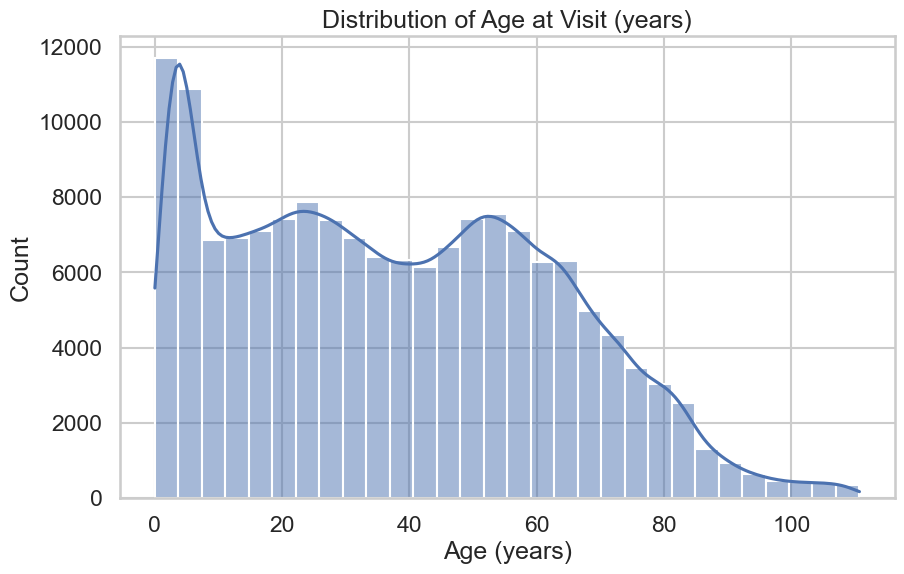

In [20]:
ax = sns.histplot(data=df, x="age_at_visit_years", bins=30, kde=True)
ax.set_title("Distribution of Age at Visit (years)")
ax.set_xlabel("Age (years)")
plt.show()

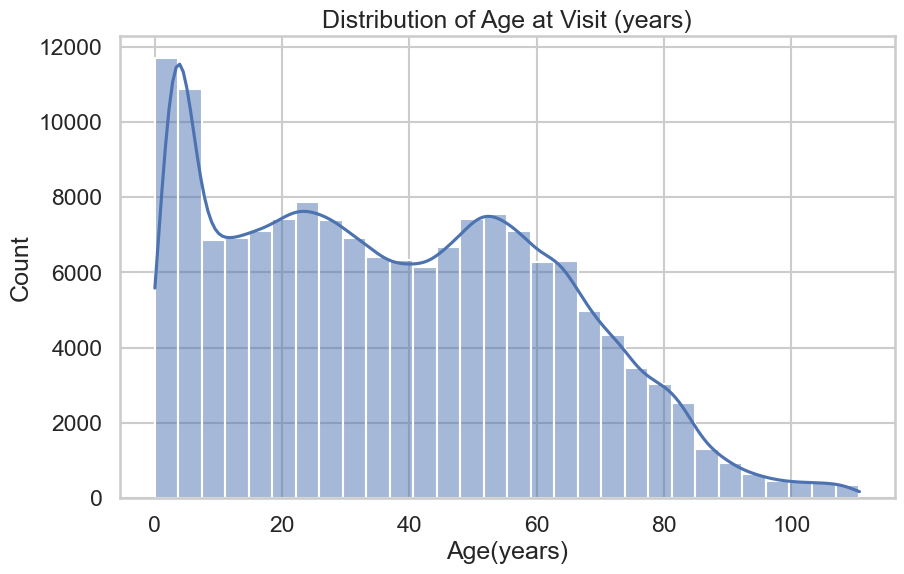

In [21]:
# Slightly alternate syntax for setting the title and x-axis label
sns.histplot(data=df, x="age_at_visit_years", bins=30, kde=True).set(title="Distribution of Age at Visit (years)", xlabel = "Age(years)")
plt.show()

In [22]:
# Code to save the image to a png file
def save_show(fig, filename):
    fig.tight_layout()
    fig.savefig(filename, dpi=150, bbox_inches="tight")

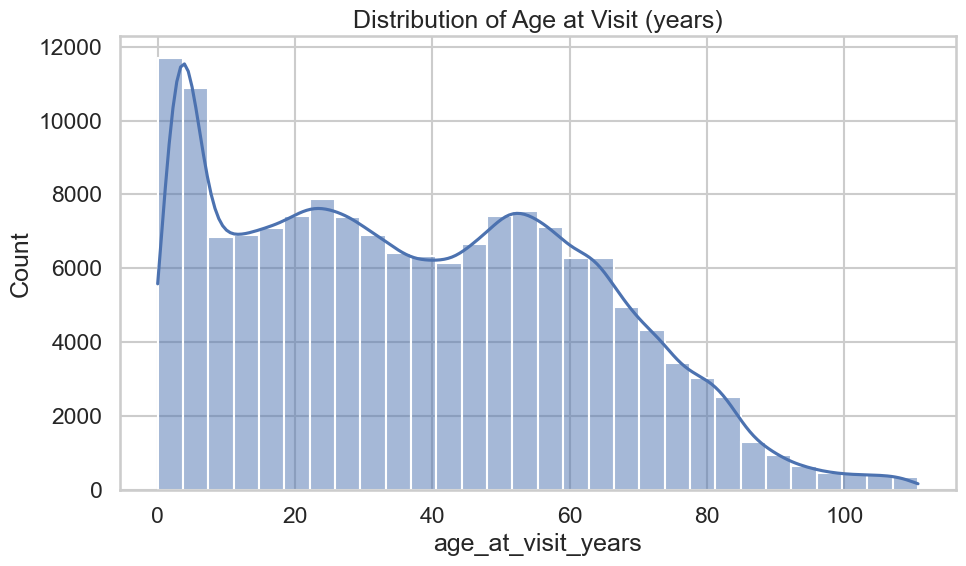

In [23]:
fig = plt.figure()
sns.histplot(data=df, x="age_at_visit_years", bins=30, kde=True).set(title="Distribution of Age at Visit (years)")
save_show(fig,"dist_age_at_visit.png")
plt.show()

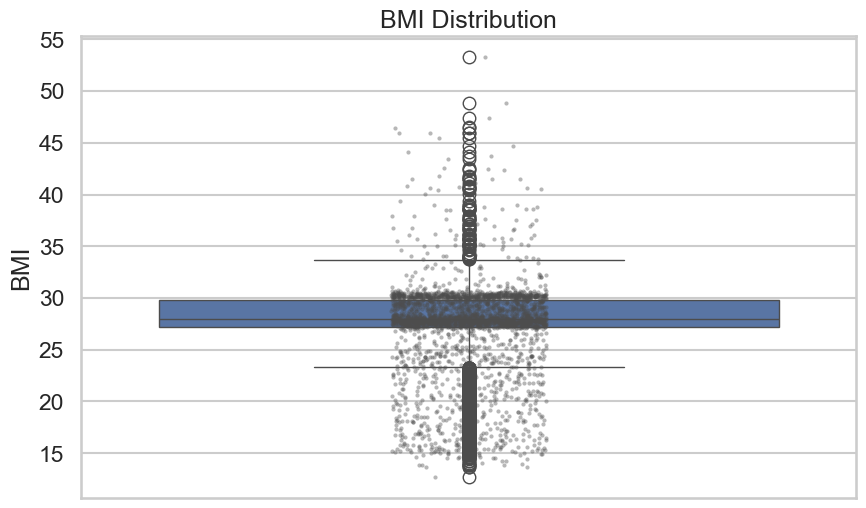

In [24]:
# BMI Distribution as a box plot
sns.boxplot(data=df, y="bmi")
sns.stripplot(data=df, y="bmi", size=3, alpha=0.4, color="0.3")  # adds jittering to see values
plt.title("BMI Distribution")
plt.ylabel("BMI")
plt.show()

Text(0, 0.5, 'Count')

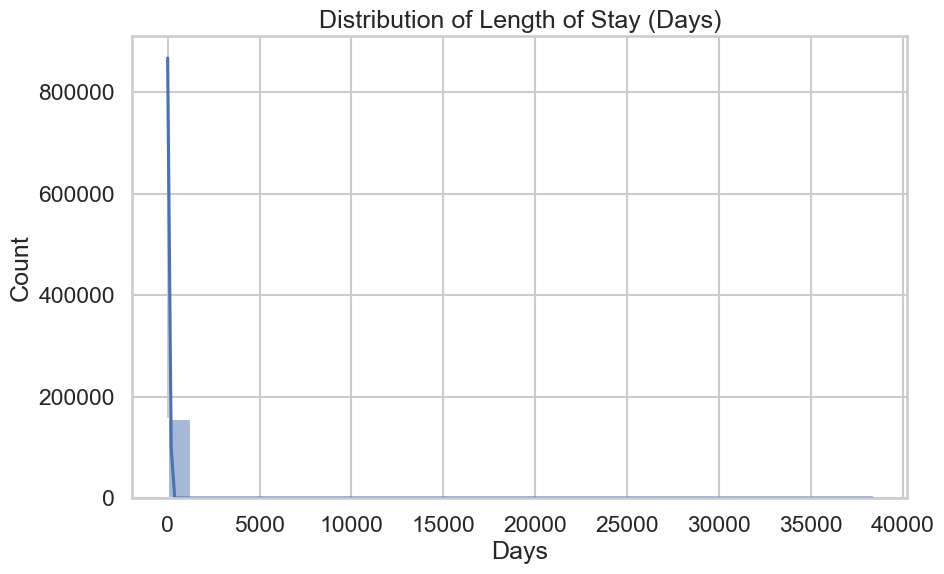

In [25]:
# Distribution of the length of stays
sns.histplot(data=df, x="length_of_stay_days", bins=30, kde=True)
plt.title("Distribution of Length of Stay (Days)")
plt.xlabel("Days")
plt.ylabel("Count")

In [26]:
# Let's see what data could be causing this.
df[df["length_of_stay_days"] > 100]

person_id birth_datetime race_source_value ethnicity_source_value  \
26             24     1951-09-14             white            nonhispanic   
183           128     1940-06-29             white            nonhispanic   
469           370     1977-09-24             white            nonhispanic   
706           564     1991-04-17             white            nonhispanic   
871           684     1979-05-06             black            nonhispanic   
...           ...            ...               ...                    ...   
153359     122081     1978-07-29             white            nonhispanic   
154478     122951     1972-12-31             black            nonhispanic   
154542     123001     1935-08-18             white            nonhispanic   
155094     123416     1986-09-30             black            nonhispanic   
155203     123495     1978-03-25             white            nonhispanic   

       gender_source_value  visit_occurrence_id visit_start_date  \
26                       F                  573       2019-09-06   
183                      F                 3314       1946-04-28   
469                      F                 8406       1995-04-15   
706                      M                13558       2000-05-11   
871                      M                16996       2013-05-12   
...                    ...                  ...              ...   
153359                   F              3083995       1997-03-29   
154478                   M              3106400       1978-09-10   
154542                   M              3107835       1948-04-25   
155094                   F              3118639       2013-09-17   
155203                   M              3119890       2016-09-18   

       visit_end_date        visit_type  \
26         2020-01-03  Outpatient Visit   
183        1997-08-03  Outpatient Visit   
469        2020-05-09  Outpatient Visit   
706        2020-03-05  Outpatient Visit   
871        2020-01-12  Outpatient Visit   
...               ...               ...   
153359     2019-06-29  Outpatient Visit   
154478     2020-05-03  Outpatient Visit   
154542     2020-03-29  Outpatient Visit   
155094     2019-11-26  Outpatient Visit   
155203     2019-12-29  Outpatient Visit   

                                                condition  ...  \
26      Acute bacterial sinusitis:Viral sinusitis:Acut...  ...   
183                                     Chronic sinusitis  ...   
469                               Acute viral pharyngitis  ...   
706                                 Cough:Viral sinusitis  ...   
871                    Chronic sinusitis:Acute bronchitis  ...   
...                                                   ...  ...   
153359                                  Chronic sinusitis  ...   
154478    Cough:Chronic sinusitis:Cough:Chronic sinusitis  ...   
154542    Chronic sinusitis:Cough:Chronic sinusitis:Cough  ...   
155094                 Chronic sinusitis:Acute bronchitis  ...   
155203                                   Acute bronchitis  ...   

       flu_last_administered  tdap_last_administered mmr_last_administered  \
26                2018-10-20              2013-09-14            1955-09-14   
183               1945-11-24                     NaT            1944-06-29   
469               1994-12-23              1989-09-24            1981-09-24   
706               1999-09-01                     NaT            1995-04-17   
871               2012-09-25              2011-05-06            1983-05-06   
...                      ...                     ...                   ...   
153359            1996-09-16              1990-07-29            1982-07-29   
154478            1977-11-26                     NaT            1976-12-31   
154542            1947-12-31              1947-08-18            1939-08-18   
155094            2012-12-25              2008-09-30            1990-09-30   
155203            2015-12-01              2010-03-25            1982-03-25   

        polio_last_

In [27]:
# For outpatient visits, assume this is a data issue and the length should be 0
is_outpatient = df['visit_type'].astype(str).str.contains('outpatient', case=False, na=False)

# align dates, then recompute LOS as zero
df.loc[is_outpatient, 'visit_end_date'] = df.loc[is_outpatient, 'visit_start_date']
df.loc[is_outpatient, 'length_of_stay_days'] = 0

Text(0, 0.5, 'Count')

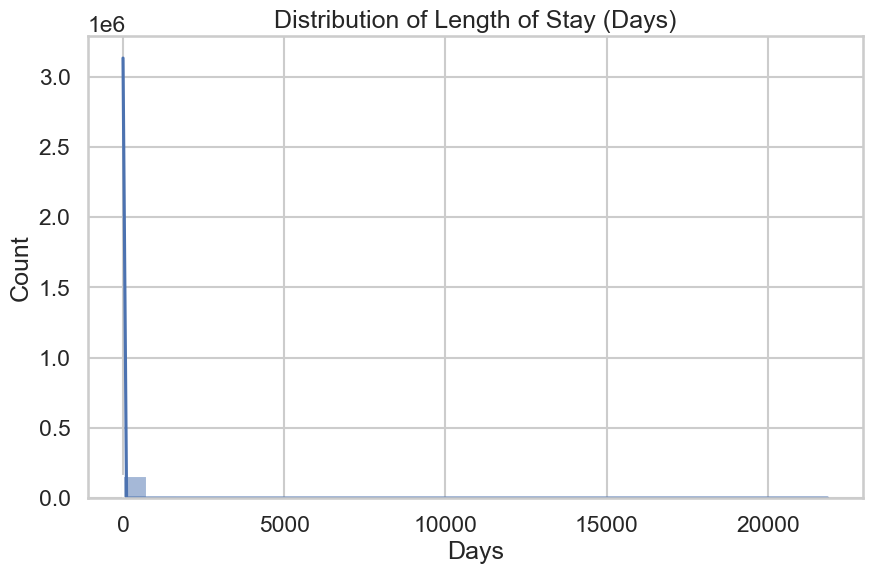

In [28]:
sns.histplot(data=df, x="length_of_stay_days", bins=30, kde=True)
plt.title("Distribution of Length of Stay (Days)")
plt.xlabel("Days")
plt.ylabel("Count")


In [29]:
df[df["length_of_stay_days"] > 100]

person_id birth_datetime race_source_value ethnicity_source_value  \
1070          843     1936-07-30             white            nonhispanic   
2372         1876     1960-07-23             asian            nonhispanic   
10768        8484     1921-12-19             white            nonhispanic   
11824        9327     1955-06-18             white            nonhispanic   
12297        9715     1951-12-03             white            nonhispanic   
12298        9715     1951-12-03             white            nonhispanic   
18926       14848     1992-03-28             white            nonhispanic   
20758       16297     1936-08-04             white               hispanic   
20759       16297     1936-08-04             white               hispanic   
20760       16297     1936-08-04             white               hispanic   
20761       16297     1936-08-04             white               hispanic   
27533       21689     1937-01-29             white            nonhispanic   
31302       24783     1919-06-29             white            nonhispanic   
42043       33359     1947-04-02             white            nonhispanic   
44997       35718     1931-11-01             white            nonhispanic   
51627       40997     1944-06-02             white            nonhispanic   
52352       41626     1913-07-02             black            nonhispanic   
54192       43130     1933-04-25             black            nonhispanic   
54193       43130     1933-04-25             black            nonhispanic   
55949       44501     1910-02-13             white            nonhispanic   
69089       55038     1963-08-08             white            nonhispanic   
69187       55117     1937-09-07             white            nonhispanic   
69188       55117     1937-09-07             white            nonhispanic   
69538       55393     1961-01-28             white            nonhispanic   
69539       55393     1961-01-28             white            nonhispanic   
69540       55393     1961-01-28             white            nonhispanic   
70633       56265     1948-10-04             white            nonhispanic   
74390       59274     1938-01-11             white            nonhispanic   
74391       59274     1938-01-11             white            nonhispanic   
74392       59274     1938-01-11             white            nonhispanic   
76677       61050     1930-04-23             white            nonhispanic   
80540       64138     1930-08-12             white            nonhispanic   
87473       69571     1959-05-19             white            nonhispanic   
88361       70248     1944-05-18             white            nonhispanic   
92221       73336     1981-11-19             black            nonhispanic   
94229       74994     1936-09-02             white            nonhispanic   
94230       74994     1936-09-02             white            nonhispanic   
95880       76324     1954-07-31             white            nonhispanic   
101074      80504     1935-08-30             white            nonhispanic   
105309      83887     1950-09-14             white            nonhispanic   
109968      87652     1946-02-23             white            nonhispanic   
109969      87652     1946-02-23             white            nonhispanic   
115753      92252     1919-10-20             white               hispanic   
116748      93017     1931-11-28             black            nonhispanic   
117611      93745     1940-12-15             white            nonhispanic   
122136      97244     1964-10-09             white            nonhispanic   
122344      97413     1949-12-28             white            nonhispanic   
124208      98886     1914-09-05             asian            nonhispanic   
131297     104562     1912-04-03             white            nonhispanic   
135825     108173     1937-11-16             white            nonhispanic   
137323     109398     1936-07-24             white            nonhispanic   
1410

In [30]:
# remove any records where length_of_stay_days > 100
df = df[df["length_of_stay_days"] <= 100].copy()

Text(0, 0.5, 'Count')

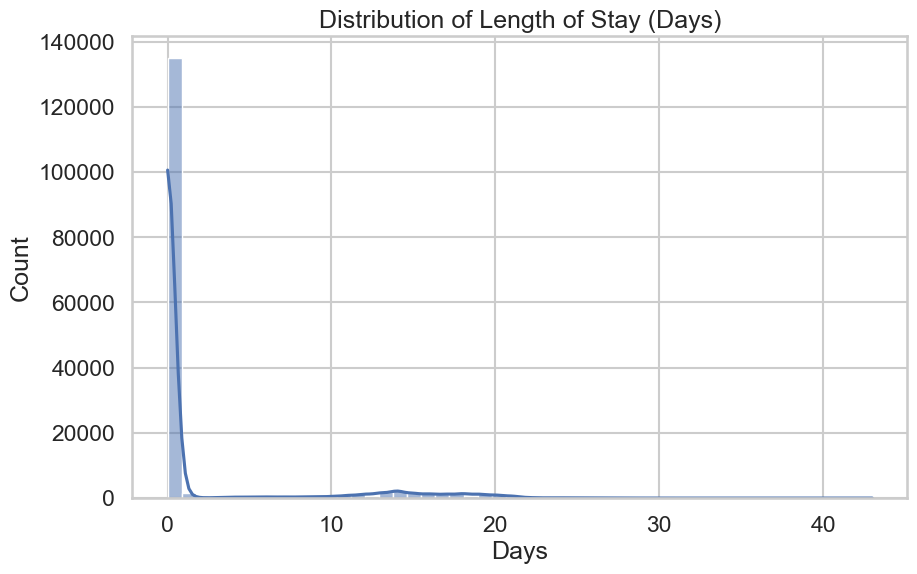

In [31]:
sns.histplot(data=df, x="length_of_stay_days", bins=50, kde=True)
plt.title("Distribution of Length of Stay (Days)")
plt.xlabel("Days")
plt.ylabel("Count")


Completely dominated by zero days - let's just look at inpatient/emergency room visits

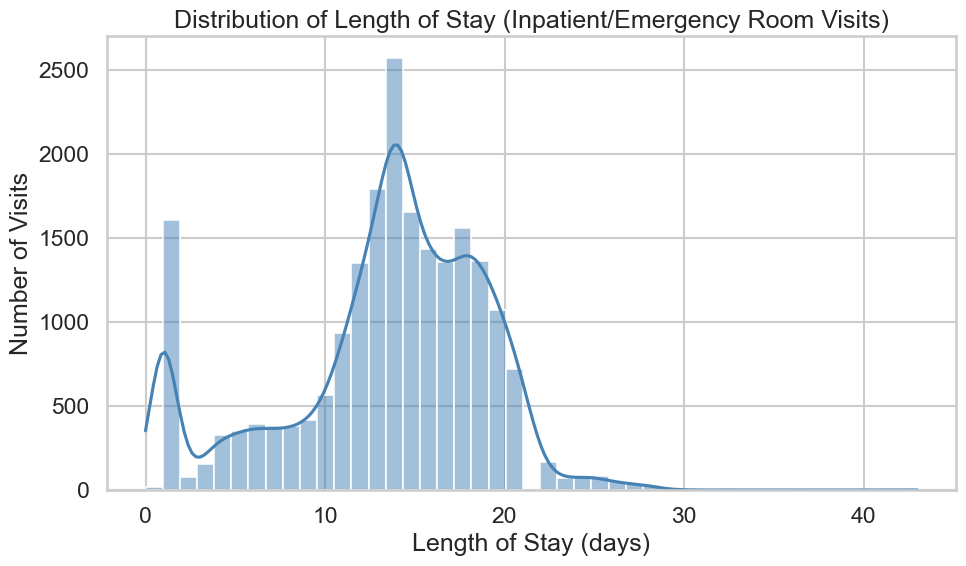

In [32]:
# filter to non-outpatient visits
non_outpatient = df[~df["visit_type"].astype(str).str.contains("outpatient", case=False, na=False)]

# basic distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=non_outpatient,
    x="length_of_stay_days",
    bins=45,
    kde=True,
    color="steelblue"
)
plt.title("Distribution of Length of Stay (Inpatient/Emergency Room Visits)")
plt.xlabel("Length of Stay (days)")
plt.ylabel("Number of Visits")
plt.tight_layout()
plt.show()


In [33]:
# Now, let's look a blood pressure

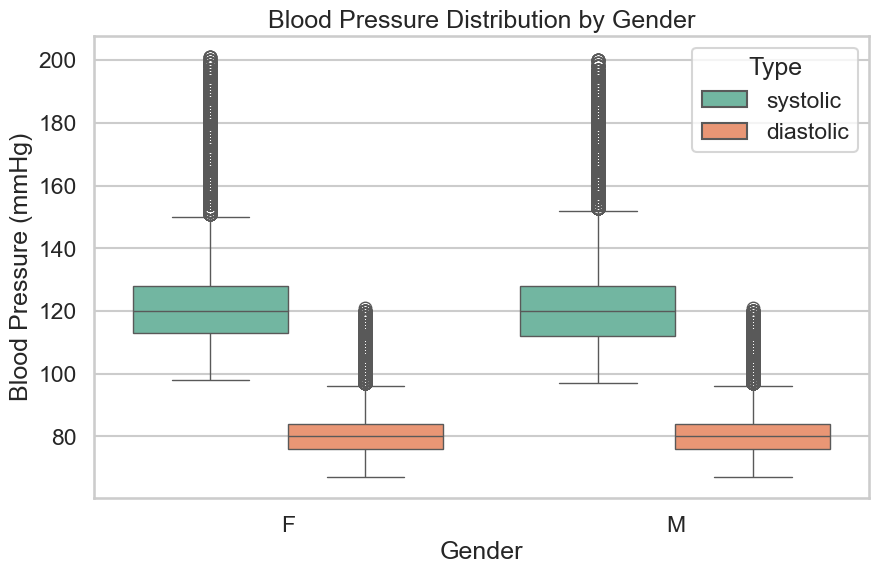

In [34]:
# Melt systolic/diastolic into long form
bp_long = df.melt(
    id_vars=["gender_source_value"],
    value_vars=["systolic", "diastolic"],
    var_name="Blood Pressure Type",
    value_name="Value"
)

sns.boxplot(
    data=bp_long,
    x="gender_source_value",
    y="Value",
    hue="Blood Pressure Type",
    palette="Set2"
)

plt.title("Blood Pressure Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Blood Pressure (mmHg)")
plt.legend(title="Type")


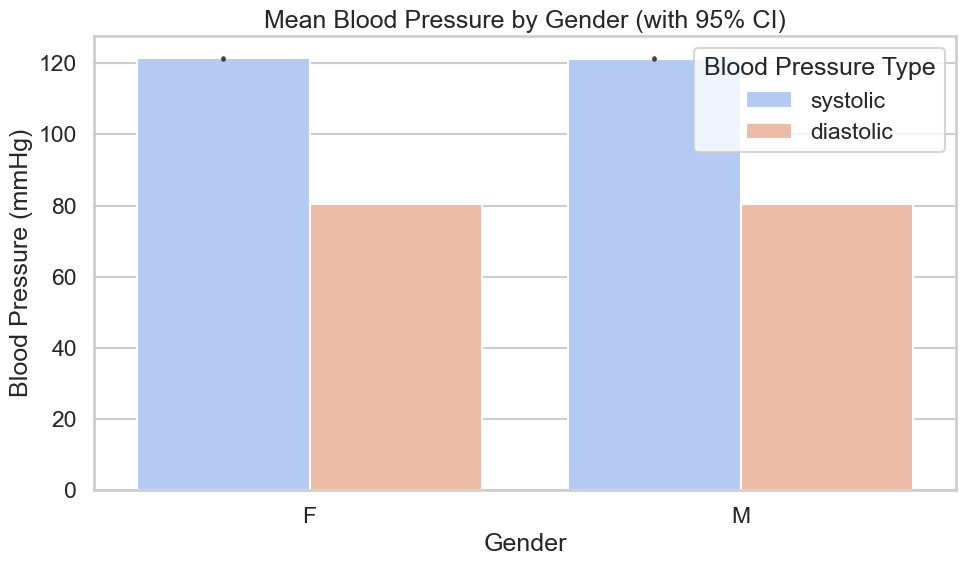

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bp_long,
    x="gender_source_value",
    y="Value",
    hue="Blood Pressure Type",
    errorbar=('ci', 95),
    palette="coolwarm"
)
plt.title("Mean Blood Pressure by Gender (with 95% CI)")
plt.xlabel("Gender")
plt.ylabel("Blood Pressure (mmHg)")
plt.tight_layout()
plt.show()

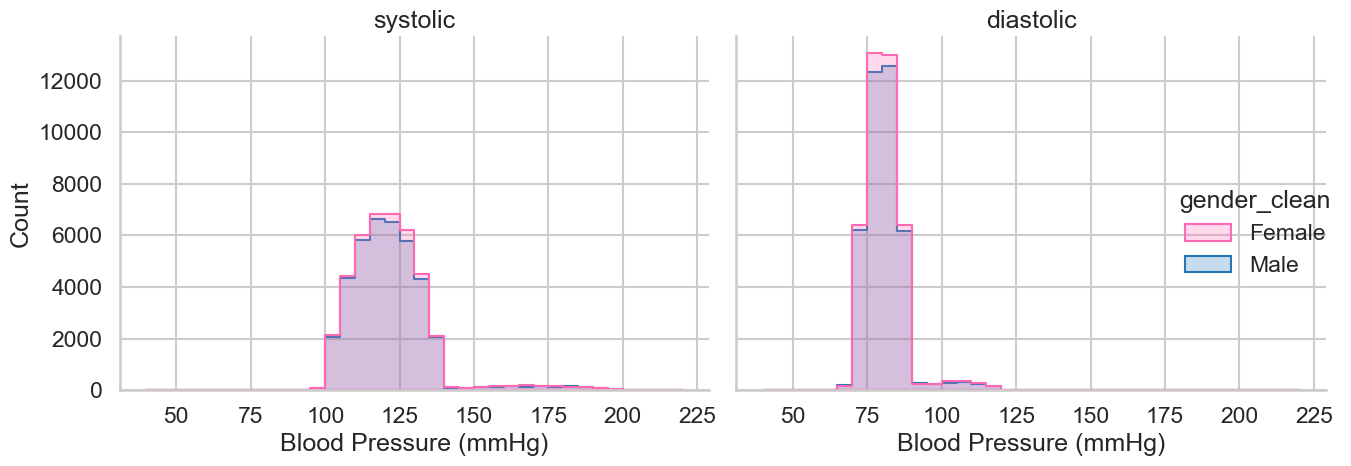

In [36]:
g_raw = df["gender_source_value"].astype(str).str.strip().str.lower()
df["gender_clean"] = np.where(
    g_raw.str.startswith("m"), "Male",
    np.where(g_raw.str.startswith("f"), "Female", "Other")
)

# long (tidy) format
bp_long = df.melt(
    id_vars=["gender_clean"],
    value_vars=["systolic", "diastolic"],
    var_name="Blood Pressure Type",
    value_name="Value"
).dropna(subset=["Value"])

# keep only Male/Female as requested
bp_long = bp_long[bp_long["gender_clean"].isin(["Male", "Female"])]

# --- Plot: histograms by gender, split (facet) by BP type ---
palette = {"Male": "#1f77b4", "Female": "#ff69b4"}  # blue / pink

# choose sensible binning; you can tweak the range as needed
bins = np.arange(40, 221, 5)  # 5 mmHg bins from 40 to 220

g = sns.displot(
    data=bp_long,
    x="Value",
    hue="gender_clean",
    col="Blood Pressure Type",
    kind="hist",
    bins=bins,
    element="step",           # overlaid outlines for clarity
    common_bins=True,         # same bins for both facets
    multiple="layer",         # overlay, not stacked
    palette=palette,
    height=5,
    aspect=1.2
)

g.set_axis_labels("Blood Pressure (mmHg)", "Count")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

## Comparisons
This section contrasts groups side-by-side to surface differences in level and spread (e.g., inpatient vs. outpatient, deceased vs. non-deceased). Clustered bars and faceted plots make it easy to see rank order, gaps, and effect sizes, guiding where deeper analysis is warranted.

condition_item
Acute viral pharyngitis       8292
Acute respiratory failure     8714
Sore throat symptom          12782
Viral sinusitis              16103
Dyspnea                      17939
Wheezing                     17939
Respiratory distress         18177
Pneumonia                    19502
Chronic sinusitis            26739
Cough                        61710
Name: count, dtype: int64


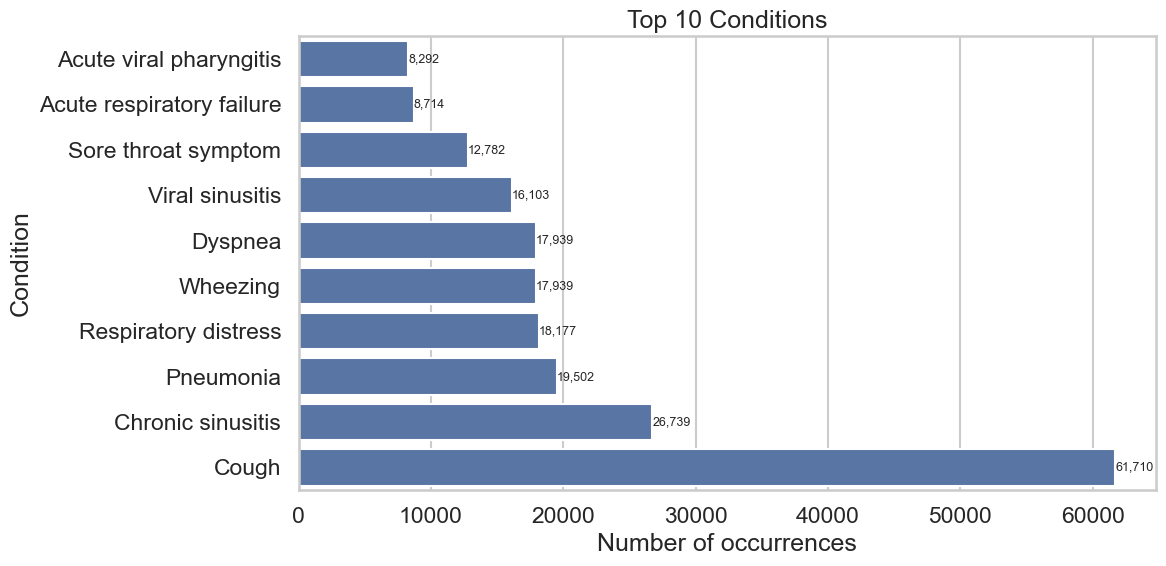

In [37]:
# Comparison Bar Chart
top = (cond_long["condition_item"]
       .dropna()
       .value_counts()
       .head(10)
       .sort_values(ascending=True))  

print(top)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top.values, y=top.index, orient="h")
ax.set_title("Top 10 Conditions")
ax.set_xlabel("Number of occurrences")
ax.set_ylabel("Condition")

# nice value labels at the end of each bar
for i, v in enumerate(top.values):
    ax.text(v, i, f"{v:,}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

In [38]:
# Comparison of visit length by gender (and showing distribution)
inpatient = df[df["visit_type"].astype(str).str.contains("inpatient", case=False, na=False)]


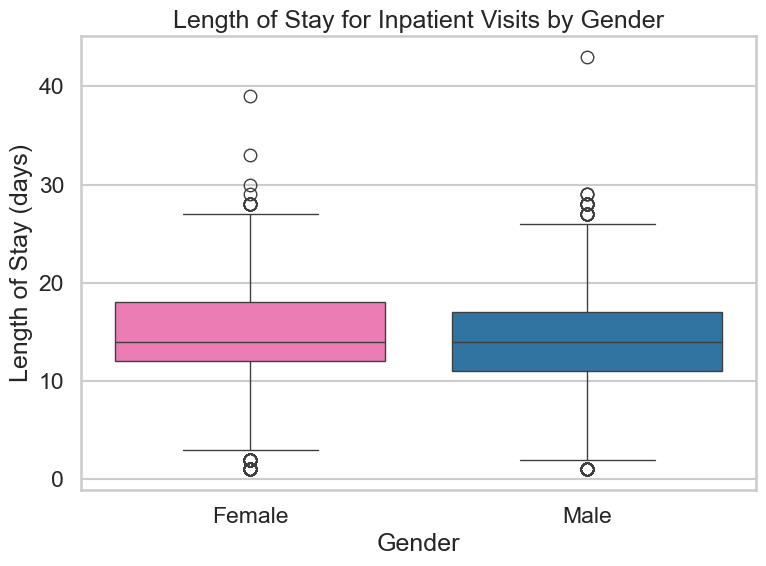

In [39]:
plt.figure(figsize=(8, 6))
palette = {"Male": "#1f77b4", "Female": "#ff69b4"}
sns.boxplot(
    data=inpatient,
    x="gender_clean",
    y="length_of_stay_days",
    hue="gender_clean",          # ← add hue
    dodge=False,                 # ← keep a single box per category
    palette=palette,
    legend=False                 # ← hide redundant legend
)
plt.title("Length of Stay for Inpatient Visits by Gender")
plt.xlabel("Gender")
plt.ylabel("Length of Stay (days)")
plt.tight_layout()
plt.show()

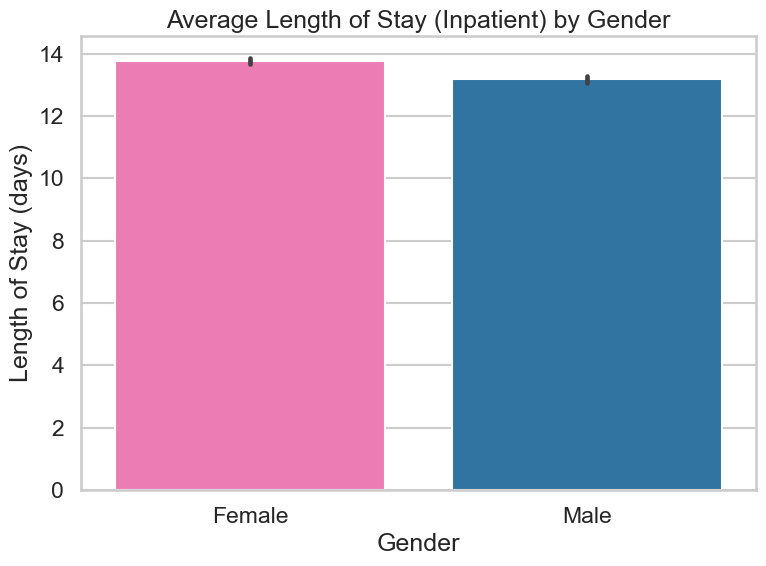

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=inpatient,
    x="gender_clean",
    y="length_of_stay_days",
    hue="gender_clean",          # same trick
    dodge=False,
    errorbar=('ci', 95),
    palette=palette,
    legend=False
)
plt.title("Average Length of Stay (Inpatient) by Gender")
plt.xlabel("Gender")
plt.ylabel("Length of Stay (days)")
plt.tight_layout()
plt.show()

<Axes: xlabel='gender_clean', ylabel='length_of_stay_days'>

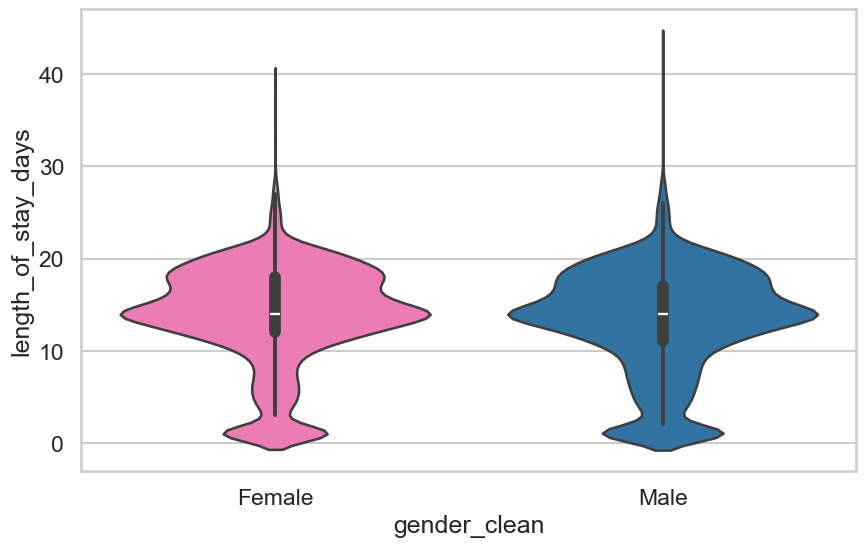

In [41]:
sns.violinplot(
    data=inpatient,
    x="gender_clean",
    y="length_of_stay_days",
    palette=palette,
    hue="gender_clean",
    legend=False
)

In [42]:
# Additional Comparisons: Condition and visit type
# Condition counts by visit type / outcome, etc.
# (assuming df has 'visit_type' and 'deceased')
cond_by_visit_type = (
    cond_long
    .merge(df[["visit_occurrence_id", "visit_type", "deceased"]], on="visit_occurrence_id", how="left")
    .groupby(["visit_type", "condition_item"])
    .size()
    .reset_index(name="count")
    .sort_values(["visit_type","count"], ascending=[True,False])
)
cond_by_visit_type.head(8)

visit_type             condition_item  count
1   Emergency Room Visit  Acute respiratory failure     13
3   Emergency Room Visit        Pulmonary emphysema      3
0   Emergency Room Visit           Acute bronchitis      2
2   Emergency Room Visit   Emphysematous bronchitis      2
19       Inpatient Visit                  Pneumonia  19488
22       Inpatient Visit       Respiratory distress  18163
11       Inpatient Visit                      Cough  11988
7        Inpatient Visit  Acute respiratory failure   8693

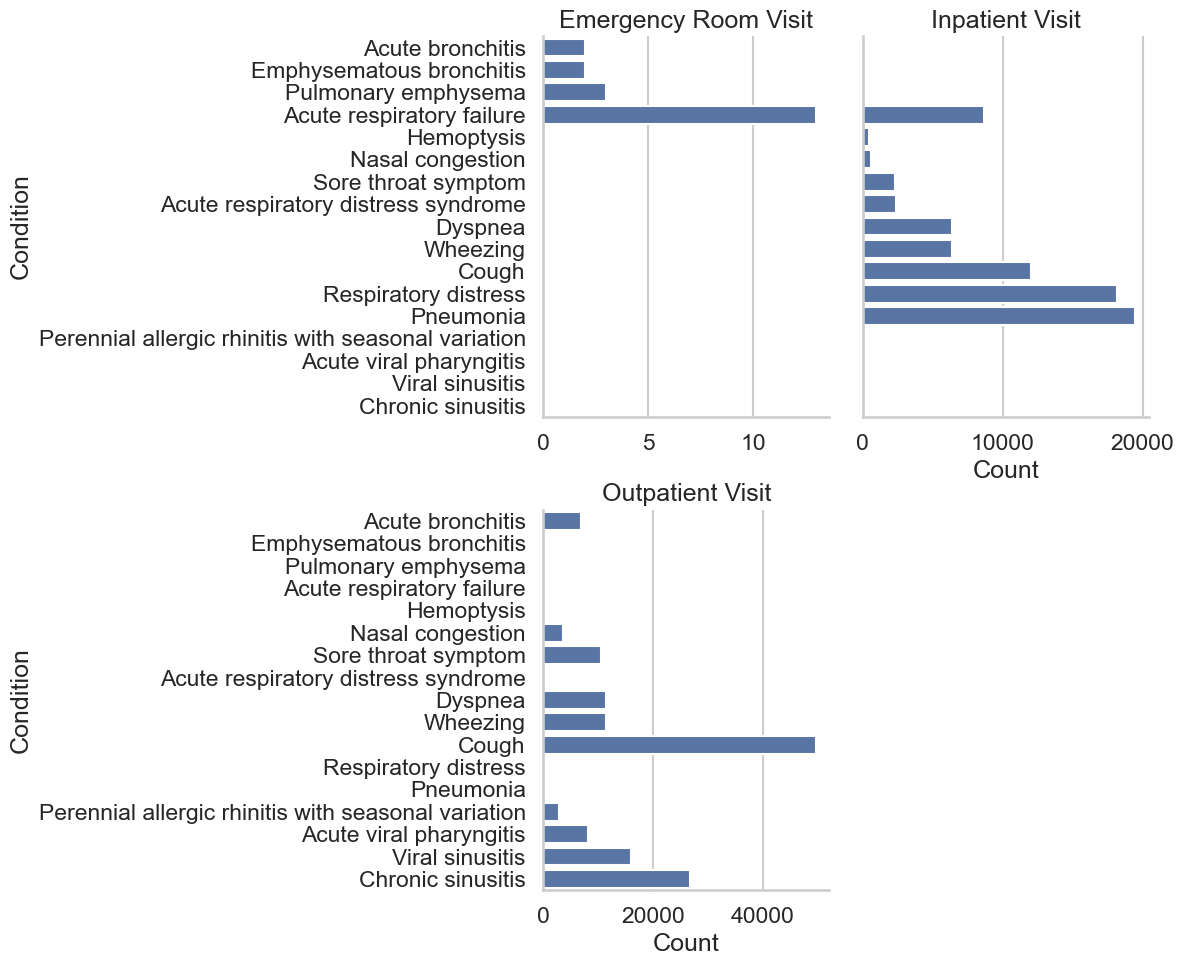

In [43]:
TOP_K = 10
ranked = (cond_by_visit_type
          .assign(rank=cond_by_visit_type.groupby("visit_type")["count"]
                  .rank(method="first", ascending=False))
          .query("rank <= @TOP_K"))

# percent share within each visit type
ranked = ranked.merge(
    cond_by_visit_type.groupby("visit_type", as_index=False)["count"].sum().rename(columns={"count": "visit_total"}),
    on="visit_type", how="left"
)
ranked["pct"] = (ranked["count"] / ranked["visit_total"] * 100).round(1)

# order bars by count within each facet
ranked["condition_item"] = ranked["condition_item"].astype(str)
ranked["condition_order"] = ranked.groupby("visit_type")["count"].rank(ascending=True, method="first")
ranked = ranked.sort_values(["visit_type", "condition_order"])

# plot
g = sns.catplot(
    data=ranked,
    x="count", y="condition_item",
    col="visit_type", col_wrap=2,  # wrap if many visit types
    kind="bar", orient="h", sharex=False, height=5, aspect=1.2
)
g.set_axis_labels("Count", "Condition")
g.set_titles("{col_name}")


plt.tight_layout()
plt.show()

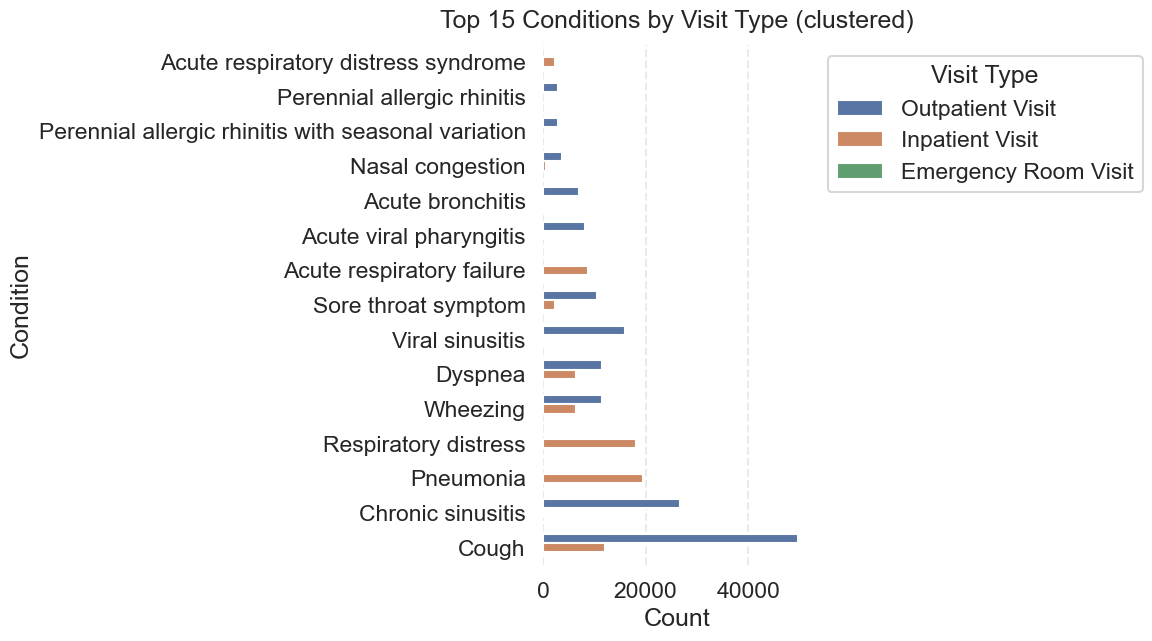

In [44]:
# Alternate view as clustered(grouped) horizontal bar
N = 15  # number of top conditions overall to show
H = max(6, N * 0.45)  # figure height that scales with N

# 1) Pick the overall top-N conditions (by total count across visit types)
overall = (cond_by_visit_type.groupby("condition_item", observed=True)["count"]
           .sum()
           .sort_values(ascending=False))
top_conditions = overall.head(N).index

# 2) Filter and order categories so the biggest end up at the bottom
plot_df = cond_by_visit_type[cond_by_visit_type["condition_item"].isin(top_conditions)].copy()

# y-order: ascending total so largest ends up at the top of the chart
y_order = (plot_df.groupby("condition_item", observed=True)["count"]
           .sum()
           .sort_values(ascending=True).index)

# (optional) consistent visit_type order by total volume
hue_order = (plot_df.groupby("visit_type", observed=True)["count"]
             .sum()
             .sort_values(ascending=False).index)

# 3) Plot clustered horizontal bars
plt.figure(figsize=(12, H))
ax = sns.barplot(
    data=plot_df,
    x="count", y="condition_item",
    hue="visit_type", hue_order=hue_order,
    order=y_order, orient="h"
)

ax.set_title(f"Top {N} Conditions by Visit Type (clustered)", pad=12)
ax.set_xlabel("Count")
ax.set_ylabel("Condition")

# Put legend outside and clean up
ax.legend(title="Visit Type", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)
sns.despine(left=True, bottom=True)
ax.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

## Relationships
Here we examine how variables move together—both numerically and clinically relevant pairs (e.g., vitals vs. outcomes, age vs. length of stay).

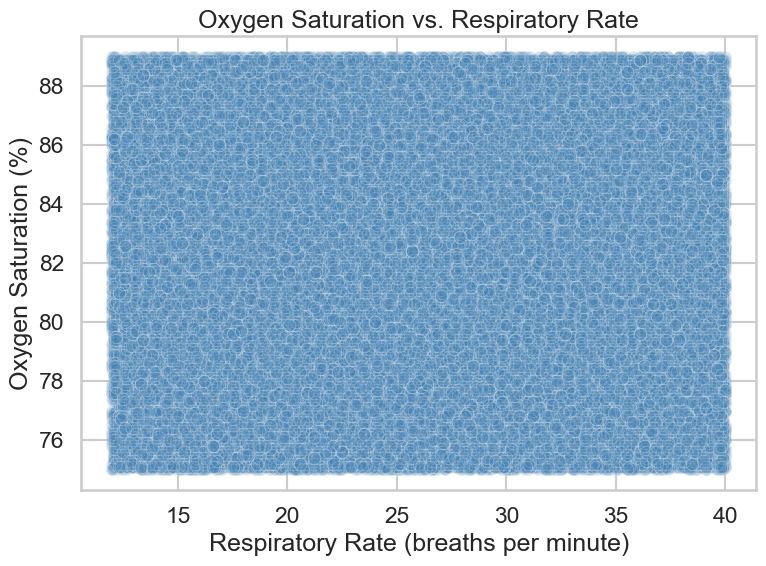

In [45]:
# drop missing values
df_rel = df.dropna(subset=["oxygen_saturation_percent", "respiratory_rate_per_minute"]).copy()

# base scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_rel,
    x="respiratory_rate_per_minute",
    y="oxygen_saturation_percent",
    alpha=0.2,
    color="steelblue"
)
plt.title("Oxygen Saturation vs. Respiratory Rate")
plt.xlabel("Respiratory Rate (breaths per minute)")
plt.ylabel("Oxygen Saturation (%)")
plt.tight_layout()
plt.show()

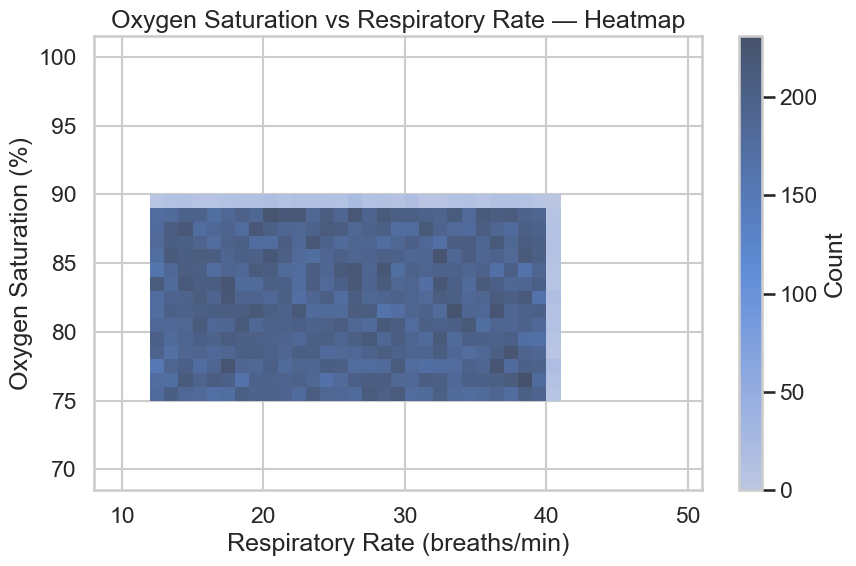

In [46]:
# Bins (tweak as needed)
rr_bins = np.arange(10, 50, 1)      # 1-bpm bins
spo2_bins = np.arange(70, 101, 1)  # 1% bins

plt.figure(figsize=(9, 6))
ax = sns.histplot(
    data=df_rel,
    x="respiratory_rate_per_minute",
    y="oxygen_saturation_percent",
    bins=[rr_bins, spo2_bins],
    cbar=True,                   # colorbar on the right
    cbar_kws={"label": "Count"},
    stat="count"                 # use "density" if you want probabilities
)
plt.title("Oxygen Saturation vs Respiratory Rate — Heatmap")
plt.xlabel("Respiratory Rate (breaths/min)")
plt.ylabel("Oxygen Saturation (%)")
plt.tight_layout()
plt.show()

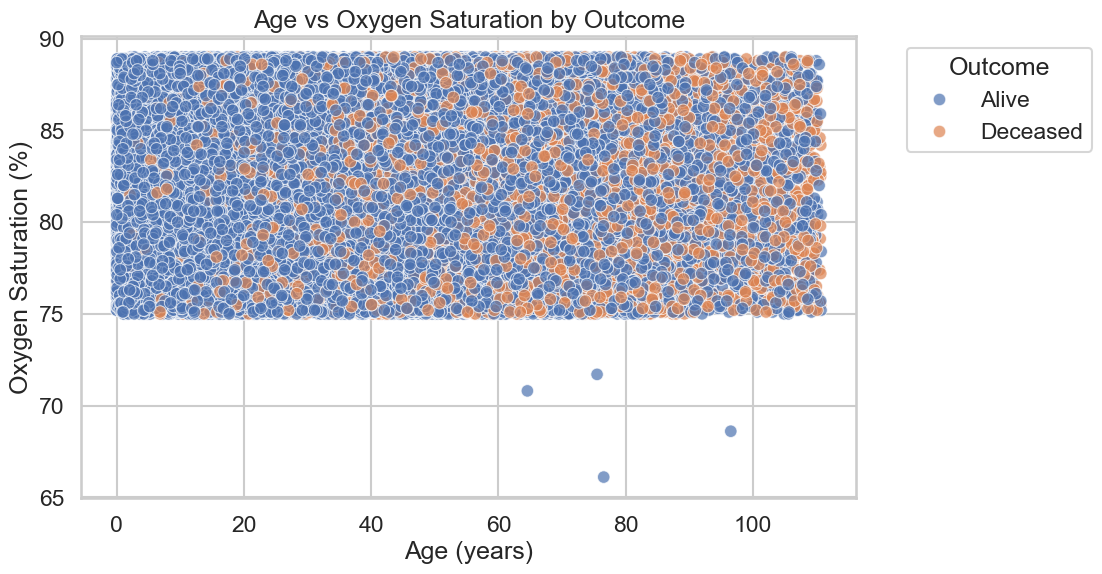

In [47]:
sns.scatterplot(
    data=df.dropna(subset=["age_at_visit_years", "oxygen_saturation_percent"]),
    x="age_at_visit_years",
    y="oxygen_saturation_percent",
    hue="deceased_flag",
    alpha=0.7
)
plt.title("Age vs Oxygen Saturation by Outcome")
plt.xlabel("Age (years)")
plt.ylabel("Oxygen Saturation (%)")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

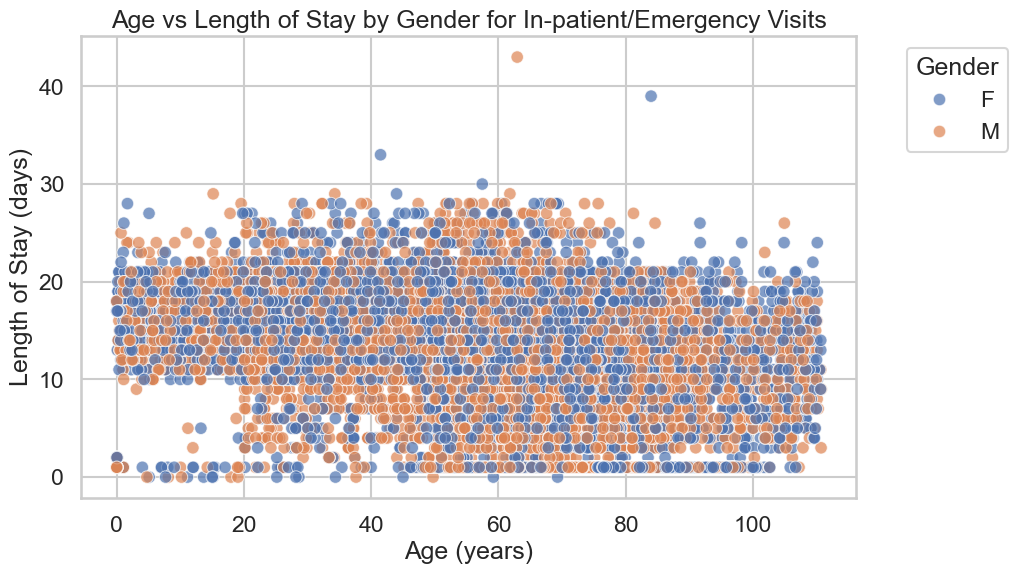

In [48]:
sns.scatterplot(
    data=non_outpatient.dropna(subset=["length_of_stay_days", "age_at_visit_years"]),
    x="age_at_visit_years",
    y="length_of_stay_days",
    hue="gender_source_value",
    alpha=0.7
)
plt.title("Age vs Length of Stay by Gender for In-patient/Emergency Visits")
plt.xlabel("Age (years)")
plt.ylabel("Length of Stay (days)")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Composition
Composition views show how whole-to-part relationships break down across categories (e.g., visit types by race/ethnicity or gender, condition mix over time). Stacked bars, stacked area, and Sankey diagrams reveal share changes and flows that raw counts can obscure.

In [49]:
def stacked_bar(df, group, hue, title, x_label=None, y_label="Count",
                normalize=False, palette="Set2"):
    """
    Build stacked bars from categorical counts (or row-wise % if normalize=True).
    """
    # NOTE: observed=False keeps current behavior (includes unused category levels).
    ct = (df.groupby([group, hue], observed=False).size()
            .reset_index(name="count")
            .pivot(index=group, columns=hue, values="count")
            .fillna(0))

    if normalize:
        ct = ct.div(ct.sum(axis=1), axis=0) * 100
        y_label = "Percent"

    group_order = ct.sum(axis=1).sort_values(ascending=False).index
    colors = sns.color_palette(palette, n_colors=ct.shape[1])

    ax = ct.loc[group_order].plot(kind="bar", stacked=True, figsize=(10, 6),
                                  color=colors, edgecolor="none")
    ax.set_title(title, pad=12)
    ax.set_xlabel(x_label or group)
    ax.set_ylabel(y_label)
    ax.legend(title=hue, bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)
    plt.tight_layout()
    plt.show()

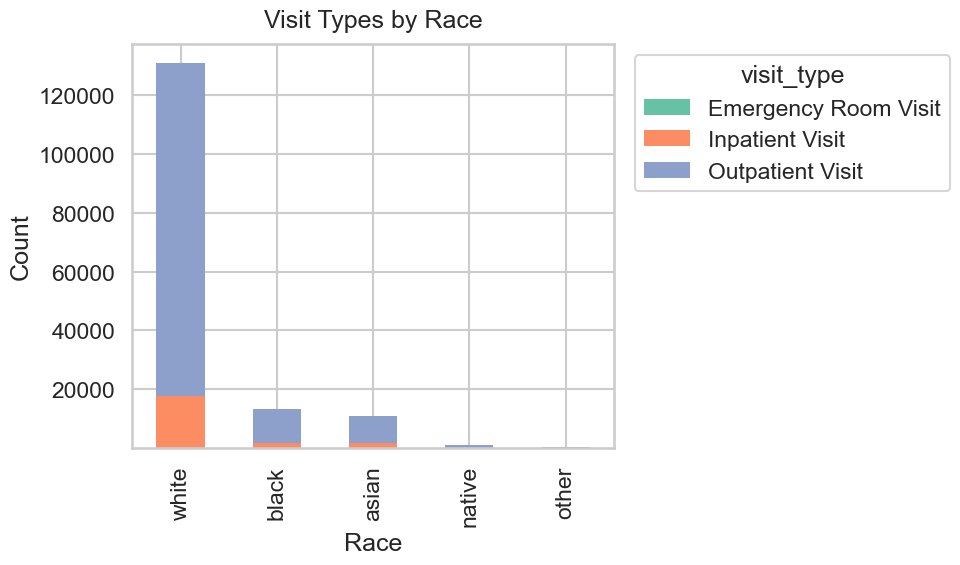

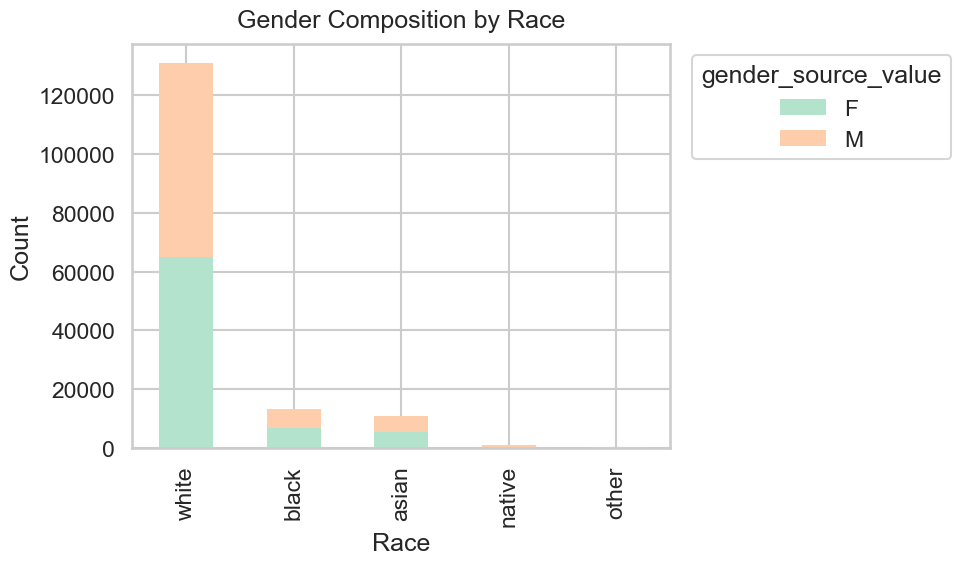

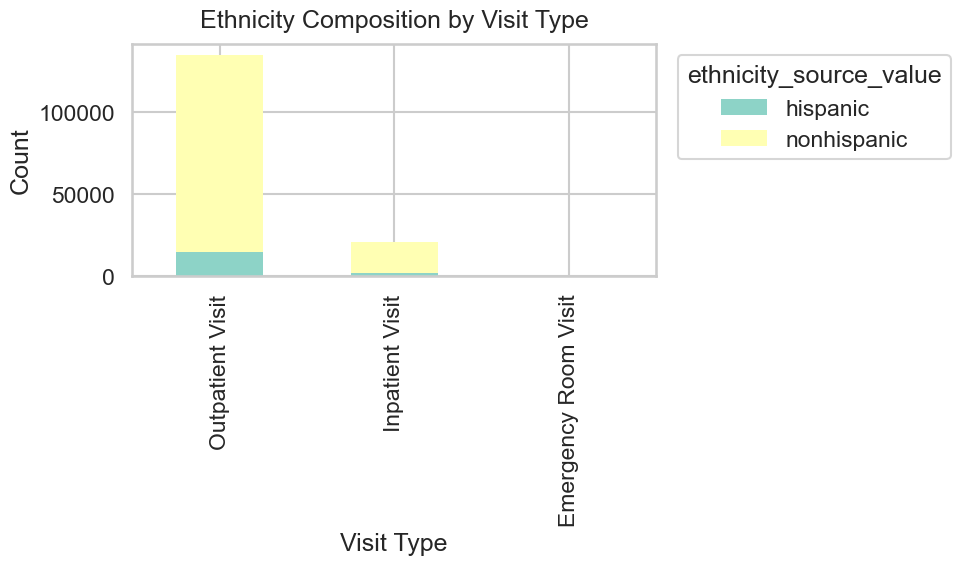

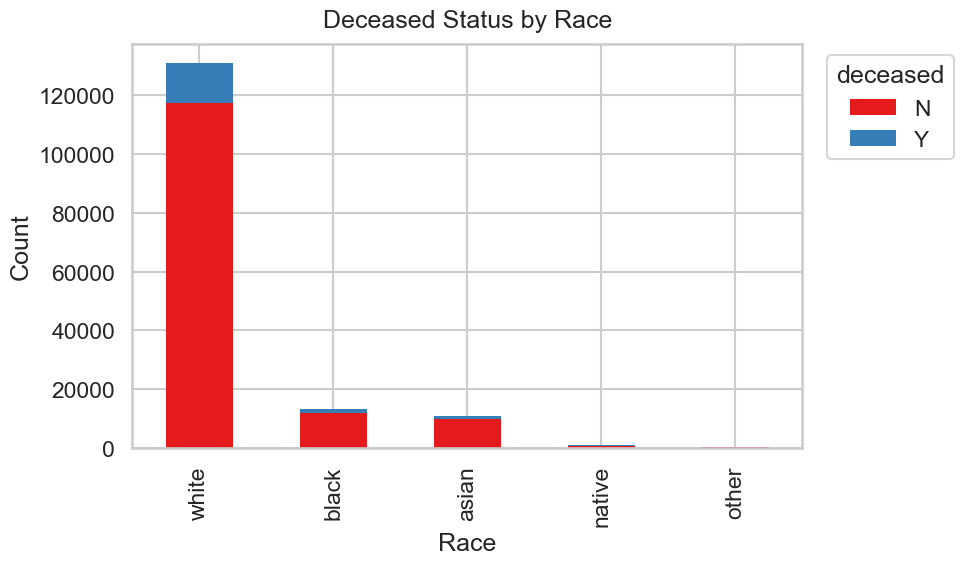

In [50]:

# 1) Visit types by race (stacked counts)
stacked_bar(
    df,
    group="race_source_value",
    hue="visit_type",
    title="Visit Types by Race",
    x_label="Race",
    palette="Set2"
)

# 2) Gender composition by race (stacked counts)
stacked_bar(
    df,
    group="race_source_value",
    hue="gender_source_value",
    title="Gender Composition by Race",
    x_label="Race",
    palette="Pastel2"
)

# 3) Ethnicity composition by visit type (stacked counts)
stacked_bar(
    df,
    group="visit_type",
    hue="ethnicity_source_value",
    title="Ethnicity Composition by Visit Type",
    x_label="Visit Type",
    palette="Set3"
)

# 4) Deceased status by race (stacked counts)
stacked_bar(
    df,
    group="race_source_value",
    hue="deceased",
    title="Deceased Status by Race",
    x_label="Race",
    palette="Set1"
)

# Optional: percentage versions of any of the above
# stacked_bar(df, "race_source_value", "visit_type", "Visit Types by Race (% within race)", x_label="Race", normalize=True)
# stacked_bar(df, "race_source_value", "gender_source_value", "Gender Composition by Race (%)", x_label="Race", normalize=True)
# stacked_bar(df, "visit_type", "ethnicity_source_value", "Ethnicity Composition by Visit Type (%)", x_label="Visit Type", normalize=True)
# stacked_bar(df, "race_source_value", "deceased", "Deceased Status by Race (%)", x_label="Race", normalize=True)

## Time series
This section examines how variables and conditions change over time. By visualizing trends, cycles, and abrupt shifts, time series plots help uncover seasonal patterns, responses to interventions, or external events that influence visit frequency, vital signs, or condition counts.

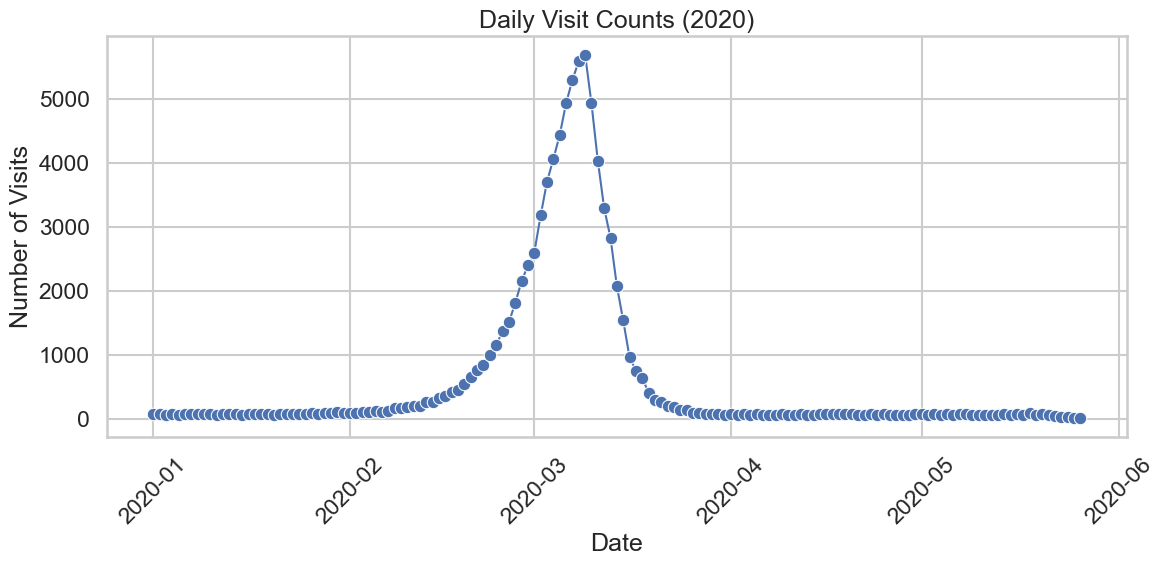

In [51]:
visits_2020 = df[df["visit_start_date"].dt.year == 2020].copy()

# --- Count visits per day ---
daily_visits = (
    visits_2020.groupby(df["visit_start_date"].dt.date)
    .size()
    .reset_index(name="visit_count")
    .rename(columns={"visit_start_date": "date"})
)

# --- Plot time series ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=daily_visits,
    x="date",
    y="visit_count",
    marker="o",
    linewidth=1.5
)

plt.title("Daily Visit Counts (2020)")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

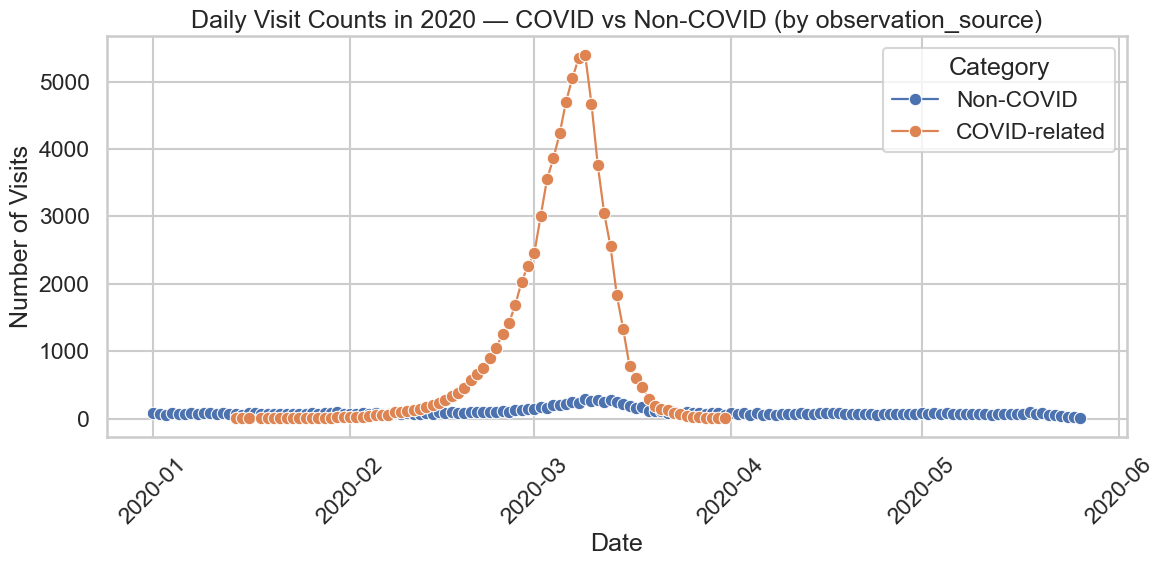

In [52]:
visits_2020 = df[df["visit_start_date"].dt.year == 2020].copy()

# --- COVID classification from observation_source (case-insensitive) ---
# Works even if observation_source is multivalued text
visits_2020["is_covid"] = (
    visits_2020["observation_source"]
      .astype(str)
      .str.contains("covid", case=False, na=False)
)

# --- Count visits per day by COVID status ---
daily = (
    visits_2020
      .groupby([visits_2020["visit_start_date"].dt.date, "is_covid"])
      .size()
      .reset_index(name="visit_count")
      .rename(columns={"visit_start_date": "date"})
)

# Friendly labels for plotting
daily["Category"] = daily["is_covid"].map({True: "COVID-related", False: "Non-COVID"})

# --- Plot daily counts ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=daily,
    x="date",
    y="visit_count",
    hue="Category",                 # hue assigned to avoid palette warning
    marker="o",
    linewidth=1.6,
    legend=True
)
plt.title("Daily Visit Counts in 2020 — COVID vs Non-COVID (by observation_source)")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Composition / Time Series

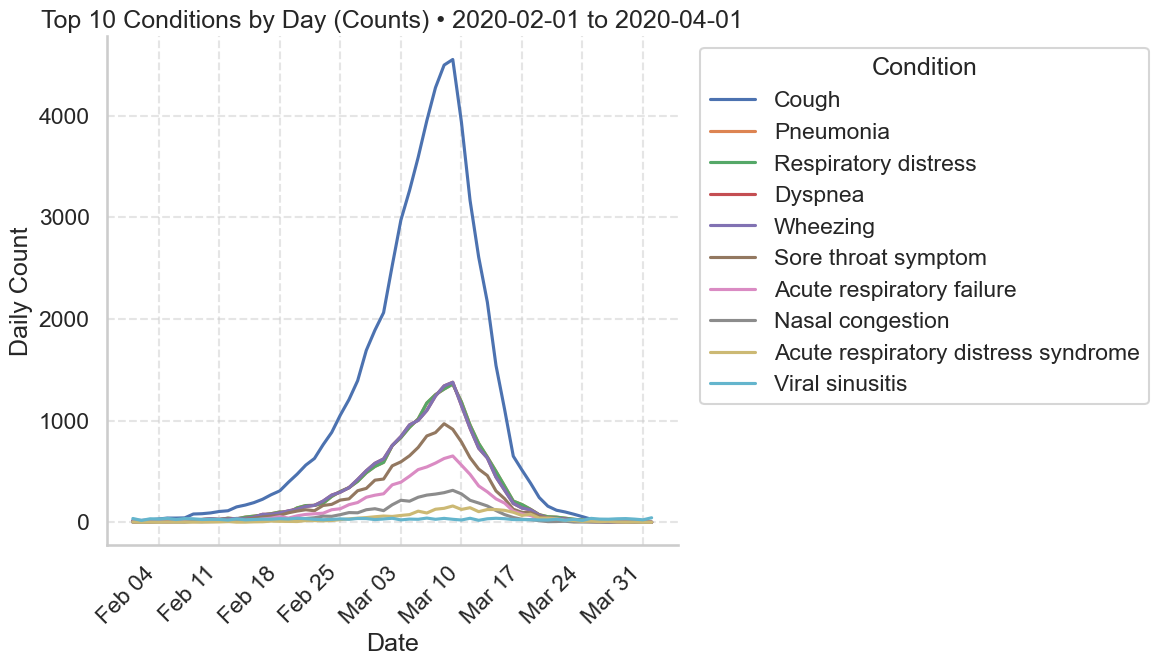

<Figure size 1200x700 with 0 Axes>

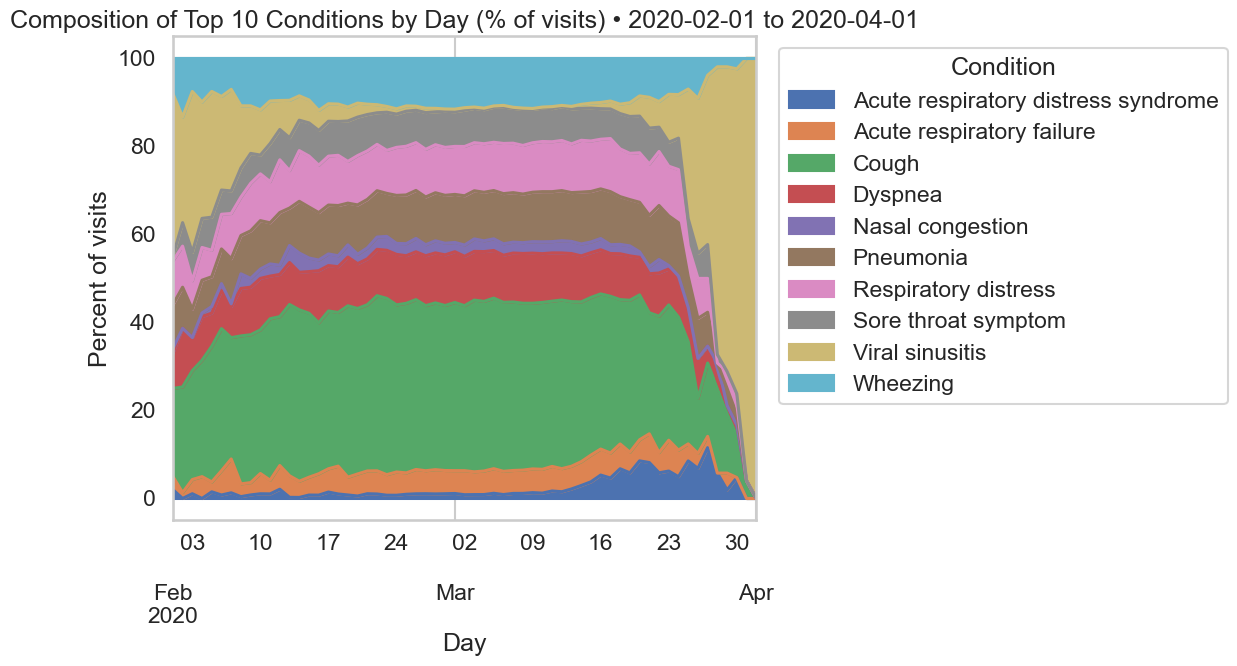

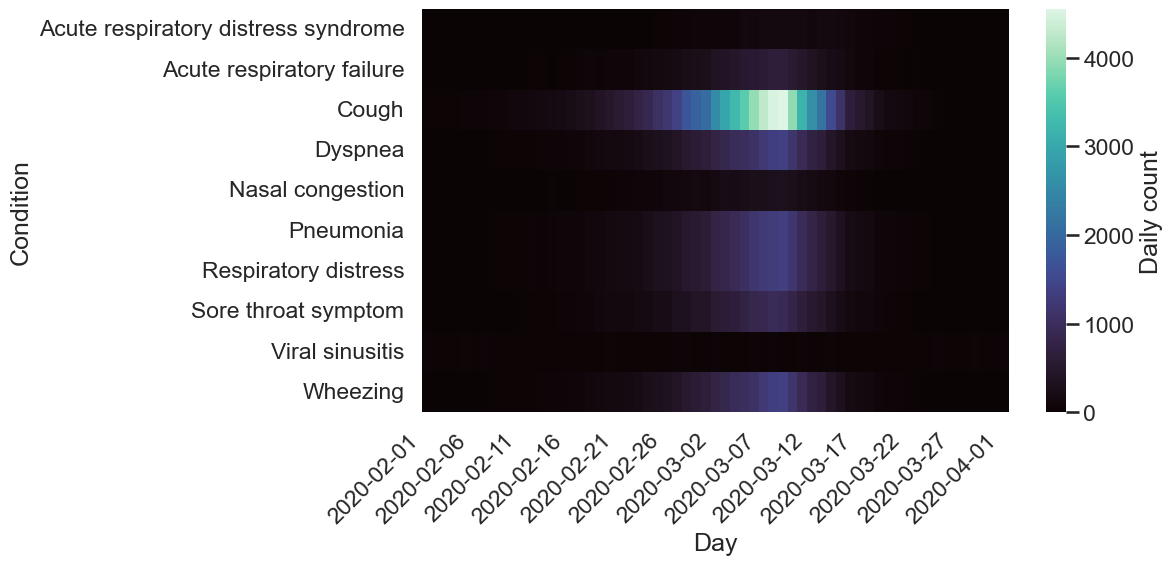

In [53]:
# --- CONFIG ---
TOP_K = 10
START = "2020-02-01"
END   = "2020-04-01"  # inclusive
# If you store numeric weights (e.g., a "count" column), set this to that name; else None for simple row counts.
WEIGHT_COL = None  # e.g., "count"

# --- Pick the date column robustly ---
date_col = "visit_start_date" if "visit_start_date" in cond_long.columns else "date"
cond = cond_long.copy()
cond[date_col] = pd.to_datetime(cond[date_col], errors="coerce")

# --- Filter to the window ---
mask = (cond[date_col] >= pd.Timestamp(START)) & (cond[date_col] <= pd.Timestamp(END))
win = cond.loc[mask].dropna(subset=[date_col, "condition_item"])

# --- Determine the TOP_K conditions within the window ---
if WEIGHT_COL is None:
    top_conditions = (win["condition_item"].value_counts().head(TOP_K).index.tolist())
else:
    top_conditions = (win.groupby("condition_item")[WEIGHT_COL]
                        .sum()
                        .sort_values(ascending=False)
                        .head(TOP_K)
                        .index
                        .tolist())

win = win[win["condition_item"].isin(top_conditions)]

# --- Daily counts for the top conditions ---
if WEIGHT_COL is None:
    daily = (win
             .assign(day=win[date_col].dt.floor("D"))
             .groupby(["day", "condition_item"])
             .size()
             .rename("count")
             .reset_index())
else:
    daily = (win
             .assign(day=win[date_col].dt.floor("D"))
             .groupby(["day", "condition_item"])[WEIGHT_COL]
             .sum()
             .rename("count")
             .reset_index())

# Ensure every condition has every day in the range (fill 0s)
full_idx = pd.MultiIndex.from_product(
    [pd.date_range(START, END, freq="D"), top_conditions],
    names=["day", "condition_item"]
)
daily = (daily
         .set_index(["day", "condition_item"])
         .reindex(full_idx, fill_value=0)
         .reset_index())

# ---------- 1) Multi-line chart (Seaborn lineplot) ----------
plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=daily, x="day", y="count", hue="condition_item")

ax.set(
    title=f"Top {TOP_K} Conditions by Day (Counts) • {START} to {END}",
    xlabel="Date",
    ylabel="Daily Count"
)

# Rotate and space out labels
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))   # one tick per week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))     # e.g. "Feb 01"
plt.xticks(rotation=45, ha='right')

# Lighten gridlines for clarity
sns.despine()
ax.grid(True, linestyle="--", alpha=0.5)

# Move legend outside for readability
ax.legend(title="Condition", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

# ---------- 2) Stacked AREA (composition over time, % per day) ----------
wide = daily.pivot(index="day", columns="condition_item", values="count").sort_index()
share = wide.div(wide.sum(axis=1).replace(0, np.nan), axis=0).fillna(0) * 100

plt.figure(figsize=(12, 7))
share.plot(kind="area", stacked=True, figsize=(12, 7))
plt.title(f"Composition of Top {TOP_K} Conditions by Day (% of visits) • {START} to {END}")
plt.xlabel("Day")
plt.ylabel("Percent of visits")
plt.legend(title="Condition", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ---------- 3) Heatmap (condition x day) ----------
heat = wide.T  # rows=condition, cols=day
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heat, cmap="mako", cbar_kws={"label": "Daily count"})
cols = heat.columns  # should be a DatetimeIndex or array-like of dates
labels = pd.Index(cols).astype(str).str[:10]   # keep 'YYYY-MM-DD'

# choose ~10–12 ticks, skipping the rest
n = len(cols)
step = max(1, n // 12)                         # show ~12 ticks (tweak as needed)
tick_idx = np.arange(0, n, step)

ax.set_xticks(tick_idx)                        # positions correspond to column indices
ax.set_xticklabels(labels[tick_idx], rotation=45, ha='right')

# optional polish
ax.set_xlabel("Day")
ax.set_ylabel("Condition")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Additional Graphs
### Co-occurences

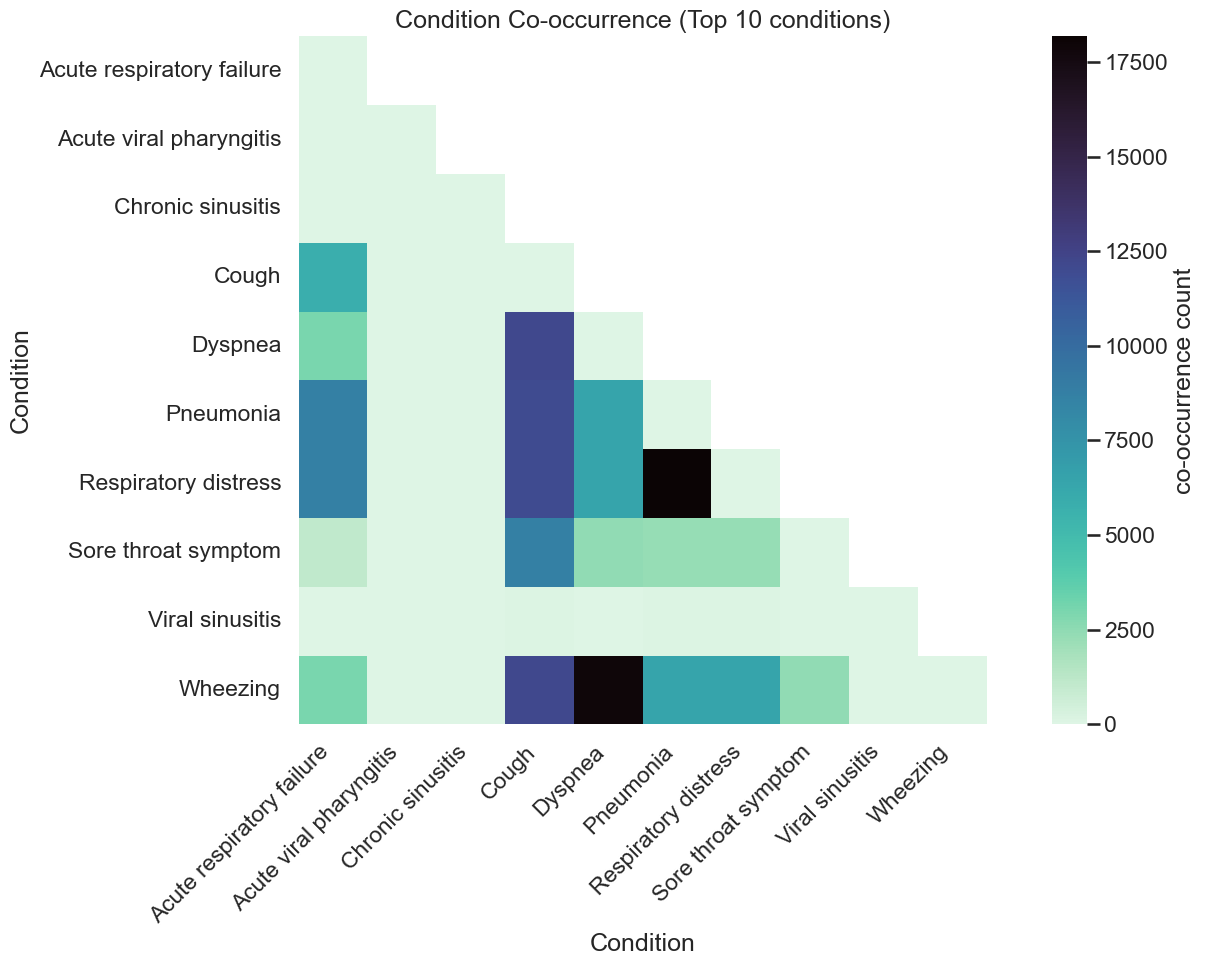

In [54]:
# what conditions co-occur?
# Co-occurrence (conditions that tend to appear together per visit)

N = 10
topN = cond_long["condition_item"].value_counts().head(N).index

matrix = (
    cond_long[cond_long["condition_item"].isin(topN)]
    .assign(val=1)
    .pivot_table(index="visit_occurrence_id", columns="condition_item", values="val", fill_value=0)
)

# co-occurrence counts (symmetric)
cooc_cnt = matrix.T.dot(matrix)   # diagonal = occurrences of each condition

np.fill_diagonal(cooc_cnt.values, 0)  # hide self-counts on diagonal

mask = np.triu(np.ones_like(cooc_cnt, dtype=bool), k=1)

plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    cooc_cnt,
    mask=mask,  # remove this line to make it symmetric
    cmap="mako_r",
    square=True,
    linewidths=0,
    cbar_kws={"label": "co-occurrence count"}
)
ax.set_title(f"Condition Co-occurrence (Top {len(cooc_cnt)} conditions)")
ax.set_xlabel("Condition")
ax.set_ylabel("Condition")
ax.grid(False)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Sankey 
A Sankey diagram is a type of flow chart that visualizes how quantities move between categories or stages. Each node represents a category, and the width of the connecting bands (or “flows”) corresponds to the magnitude of that relationship. In other words, thicker lines mean more observations flowing from one category to another. Sankey diagrams are particularly useful for showing proportional relationships and pathways through a process, allowing viewers to see both distribution and direction at once.

In this analysis, the Sankey diagram traces how conditions lead into visit types, and how those visits ultimately relate to deceased status.

In [55]:
# Sankey (Condition → Visit Type → Deceased) with robust rendering & diagnostics

import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = "notebook_connected"   # works in Jupyter classic/JLab

base = (cond_long[["visit_occurrence_id", "condition_item"]]
        .merge(df[["visit_occurrence_id", "visit_type", "deceased_flag"]],
               on="visit_occurrence_id", how="inner")
        .dropna(subset=["condition_item", "visit_type", "deceased_flag"]))

TOP_K = 12

top_conditions = base["condition_item"].value_counts().head(TOP_K).index
base = base[base["condition_item"].isin(top_conditions)]

# Build node list
conditions   = sorted(base["condition_item"].unique().tolist())
visit_types  = sorted(base["visit_type"].unique().tolist())
deceased_flg = sorted(base["deceased_flag"].unique().tolist())

nodes = conditions + visit_types + deceased_flg
node_idx = {name: i for i, name in enumerate(nodes)}

# Links: condition - visit_type
cv = (base.groupby(["condition_item", "visit_type"], observed=True)
           .size().reset_index(name="count"))
src1 = [node_idx[c] for c in cv["condition_item"]]
tgt1 = [node_idx[v] for v in cv["visit_type"]]
val1 = cv["count"].tolist()

# Links: visit_type - deceased
vd = (base.groupby(["visit_type", "deceased_flag"], observed=True)
           .size().reset_index(name="count"))
src2 = [node_idx[v] for v in vd["visit_type"]]
tgt2 = [node_idx[d] for d in vd["deceased_flag"]]
val2 = vd["count"].tolist()

fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=16, thickness=16, line=dict(width=0.5, color="gray"),
        label=nodes
    ),
    link=dict(
        source=src1 + src2,
        target=tgt1 + tgt2,
        value=val1 + val2
    )
)])

fig.update_layout(
    title=f"Sankey: Condition → Visit Type → Deceased (Top {TOP_K} conditions)",
    font=dict(size=12)
)
fig.show()

